# 📊 Exploratory Data Analysis - Movie Ticket Company

## 📖 Tổng quan EDA

**Exploratory Data Analysis (EDA)** là bước phân tích khám phá dữ liệu để:
- Hiểu sâu về dữ liệu đã được làm sạch
- Khám phá patterns, trends và relationships
- Phát hiện insights kinh doanh quan trọng
- Chuẩn bị cho việc xây dựng dashboard và báo cáo

## 🎯 Mục tiêu EDA

### 1. **Customer Insights**
- Phân tích đặc điểm khách hàng (giới tính, độ tuổi)
- Xác định segments khách hàng chính
- Hiểu hành vi mua vé của khách hàng

### 2. **Sales Performance**
- Phân tích doanh thu và số vé bán
- Xu hướng bán vé theo thời gian
- Phân tích giá vé và discount

### 3. **Campaign Effectiveness**
- Đánh giá hiệu quả các chiến dịch marketing
- So sánh các loại campaign (voucher vs direct discount)
- ROI của các chiến dịch

### 4. **Device & Platform Analysis**
- Phân tích thiết bị và platform phổ biến
- Xu hướng mobile vs web
- Impact của device lên sales

### 5. **Operational Insights**
- Phân tích ticket status và error patterns
- Hiệu suất xử lý ticket
- Theater performance

---


## 📋 EDA Framework

### **Phase 1: Data Loading & Overview**
- Load clean datasets
- Basic data summary
- Data structure verification

### **Phase 2: Customer Analysis**
- Demographic analysis
- Customer behavior patterns
- Customer segmentation

### **Phase 3: Sales Analysis**
- Revenue trends
- Ticket sales patterns
- Pricing analysis

### **Phase 4: Campaign Analysis**
- Campaign performance
- ROI analysis
- Campaign comparison

### **Phase 5: Device & Platform Analysis**
- Device usage patterns
- Platform preferences
- Mobile vs Web trends

### **Phase 6: Time Series Analysis**
- Temporal patterns
- Seasonal trends
- Growth analysis

### **Phase 7: Correlation & Insights**
- Variable relationships
- Business insights
- Actionable recommendations

---


# 🚀 PHASE 1: Data Loading & Overview

## Mục tiêu Phase 1
- Load dữ liệu đã được làm sạch
- Kiểm tra cấu trúc dữ liệu
- Thống kê tổng quan cơ bản

---


In [132]:
# Import các thư viện cần thiết cho EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Cấu hình matplotlib và seaborn
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Thiết lập hiển thị pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Đã import thành công các thư viện cần thiết")
print(f"📅 Thời gian bắt đầu EDA: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)


✅ Đã import thành công các thư viện cần thiết
📅 Thời gian bắt đầu EDA: 2025-10-04 19:29:30


In [133]:
# Load dữ liệu đã được làm sạch
print("📂 Đang load dữ liệu đã được làm sạch...")

try:
    # Load các bảng dimension
    df_customer = pd.read_csv('../data/cleaned/customer_cleaned.csv')
    df_campaign = pd.read_csv('../data/cleaned/campaign_cleaned.csv')
    df_device = pd.read_csv('../data/cleaned/device_detail_cleaned.csv')
    df_status = pd.read_csv('../data/cleaned/status_detail_cleaned.csv')
    
    # Load bảng fact chính
    df_ticket = pd.read_csv('../data/cleaned/ticket_history_cleaned.csv')
    
    print("✅ Load dữ liệu thành công!")
    
    # Chuyển đổi data types cho analysis
    df_customer['dob'] = pd.to_datetime(df_customer['dob'])
    df_ticket['time'] = pd.to_datetime(df_ticket['time'])
    
    print("✅ Chuyển đổi data types thành công!")
    
except Exception as e:
    print(f"❌ Lỗi khi load dữ liệu: {e}")
    raise


📂 Đang load dữ liệu đã được làm sạch...
✅ Load dữ liệu thành công!
✅ Chuyển đổi data types thành công!


In [134]:
# Tổng quan về dữ liệu đã làm sạch
print("📊 TỔNG QUAN DỮ LIỆU ĐÃ LÀM SẠCH")
print("="*60)

datasets = {
    '📋 Customer': df_customer,
    '📢 Campaign': df_campaign,
    '📱 Device': df_device,
    '🎫 Status': df_status,
    '🎬 Ticket History': df_ticket
}

for name, df in datasets.items():
    print(f"\n{name}")
    print(f"   📏 Kích thước: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   📝 Các cột: {list(df.columns)}")
    print(f"   💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔢 TỔNG CỘNG: {sum(df.shape[0] for df in datasets.values()):,} records")
print(f"📅 Thời gian dữ liệu: {df_ticket['time'].min()} đến {df_ticket['time'].max()}")


📊 TỔNG QUAN DỮ LIỆU ĐÃ LÀM SẠCH

📋 Customer
   📏 Kích thước: 131,400 rows × 3 columns
   📝 Các cột: ['customer_id', 'usergender', 'dob']
   💾 Memory: 8.85 MB

📢 Campaign
   📏 Kích thước: 217 rows × 2 columns
   📝 Các cột: ['campaign_id', 'campaign_type']
   💾 Memory: 0.01 MB

📱 Device
   📏 Kích thước: 139,901 rows × 3 columns
   📝 Các cột: ['device_number', 'model', 'platform']
   💾 Memory: 26.10 MB

🎫 Status
   📏 Kích thước: 8 rows × 3 columns
   📝 Các cột: ['status_id', 'description', 'error_group']
   💾 Memory: 0.00 MB

🎬 Ticket History
   📏 Kích thước: 154,647 rows × 12 columns
   📝 Các cột: ['ticket_id', 'customer_id', 'paying_method', 'theater_name', 'device_number', 'original_price', 'discount_value', 'final_price', 'time', 'status_id', 'campaign_id', 'movie_name']
   💾 Memory: 52.44 MB

🔢 TỔNG CỘNG: 426,173 records
📅 Thời gian dữ liệu: 2019-01-01 00:42:36.037000 đến 2022-12-31 23:58:51.584000


In [135]:
# Kiểm tra chất lượng dữ liệu sau khi làm sạch
print("🔍 KIỂM TRA CHẤT LƯỢNG DỮ LIỆU")
print("="*60)

for name, df in datasets.items():
    print(f"\n{name}")
    print(f"   Missing values: {df.isnull().sum().sum()}")
    print(f"   Duplicates: {df.duplicated().sum()}")
    
    # Kiểm tra data types
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
    
    if numeric_cols:
        print(f"   Numeric columns: {numeric_cols}")
    if datetime_cols:
        print(f"   Datetime columns: {datetime_cols}")

print(f"\n✅ Dữ liệu sẵn sàng cho phân tích EDA!")


🔍 KIỂM TRA CHẤT LƯỢNG DỮ LIỆU

📋 Customer
   Missing values: 0
   Duplicates: 0
   Numeric columns: ['customer_id']
   Datetime columns: ['dob']

📢 Campaign
   Missing values: 0
   Duplicates: 0
   Numeric columns: ['campaign_id']

📱 Device
   Missing values: 0
   Duplicates: 0

🎫 Status
   Missing values: 0
   Duplicates: 0
   Numeric columns: ['status_id']

🎬 Ticket History
   Missing values: 0
   Duplicates: 0
   Numeric columns: ['customer_id', 'theater_name', 'original_price', 'discount_value', 'final_price', 'status_id', 'campaign_id']
   Datetime columns: ['time']

✅ Dữ liệu sẵn sàng cho phân tích EDA!


## 📊 Basic Statistics Overview

Thống kê cơ bản về các chỉ số quan trọng


In [136]:
# Thống kê cơ bản về Ticket History (Fact Table)
print("📊 THỐNG KÊ CƠ BẢN - TICKET HISTORY")
print("="*60)

# Tính các KPI cơ bản
total_tickets = len(df_ticket)
total_revenue = df_ticket['final_price'].sum()
avg_ticket_price = df_ticket['final_price'].mean()
unique_customers = df_ticket['customer_id'].nunique()
unique_movies = df_ticket['movie_name'].nunique()

print(f"🎫 Tổng số vé bán: {total_tickets:,}")
print(f"💰 Tổng doanh thu: ${total_revenue:,.2f}")
print(f"💵 Giá vé trung bình: ${avg_ticket_price:.2f}")
print(f"👥 Số khách hàng unique: {unique_customers:,}")
print(f"🎬 Số phim unique: {unique_movies}")

# Phân tích theo status
print(f"\n📊 PHÂN TÍCH THEO STATUS:")
status_summary = df_ticket.groupby('status_id').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
status_summary.columns = ['Số vé', 'Doanh thu ($)']
print(status_summary)

# Phân tích theo campaign
print(f"\n📊 PHÂN TÍCH THEO CAMPAIGN:")
campaign_summary = df_ticket.groupby('campaign_id').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
campaign_summary.columns = ['Số vé', 'Doanh thu ($)']
print(campaign_summary.head(10))  # Top 10 campaigns


📊 THỐNG KÊ CƠ BẢN - TICKET HISTORY
🎫 Tổng số vé bán: 154,647
💰 Tổng doanh thu: $1,199,469.61
💵 Giá vé trung bình: $7.76
👥 Số khách hàng unique: 119,435
🎬 Số phim unique: 253

📊 PHÂN TÍCH THEO STATUS:
            Số vé  Doanh thu ($)
status_id                       
-7            251        1118.08
-6           1103        6352.14
-5          12079      102248.36
-4            478        3535.79
-3           3602       26368.81
-2           2612       20993.74
-1            904        6820.63
 1         133618     1032032.06

📊 PHÂN TÍCH THEO CAMPAIGN:
             Số vé  Doanh thu ($)
campaign_id                      
0            63064      577777.38
12080           18         103.64
12240            1           3.10
13730            1           4.13
13740          934         769.79
13750            3          37.51
13760           25         137.24
13790           12          51.05
13800            7          22.04
13810            6          26.01


## 🎯 **INSIGHTS TỪ PHASE 1**

### ✅ **Key Findings:**
1. **📊 Quy mô kinh doanh**: 154,647 vé, $1.2M doanh thu
2. **🎯 Tỷ lệ thành công**: 86.4% (Status 1)
3. **📈 Campaign hiệu quả**: 59.2% vé từ campaigns
4. **👥 Customer base**: 119,435 khách hàng unique
5. **🎬 Product diversity**: 253 phim khác nhau

### 🔍 **Business Implications:**
- **Success Rate cao**: 86.4% cho thấy hệ thống ổn định
- **Campaign Impact**: Marketing campaigns có tác động tích cực
- **Customer Penetration**: ~1.3 vé/khách hàng trung bình

---


# 👥 PHASE 2: Customer Analysis

## Mục tiêu Phase 2
- Phân tích đặc điểm nhân khẩu học khách hàng
- Khám phá hành vi mua vé
- Xác định customer segments chính

---


In [137]:
# Merge dữ liệu customer với ticket để phân tích
print("🔗 MERGE DỮ LIỆU CUSTOMER VÀ TICKET")
print("="*60)

# Merge customer data với ticket data
df_customer_ticket = df_ticket.merge(df_customer, on='customer_id', how='left')

print(f"📊 Sau khi merge:")
print(f"   Records: {len(df_customer_ticket):,}")
print(f"   Columns: {len(df_customer_ticket.columns)}")

# Tính tuổi từ ngày sinh
current_date = datetime.now()
df_customer_ticket['age'] = (current_date - df_customer_ticket['dob']).dt.days // 365

print(f"✅ Đã tính toán age cho customer analysis")


🔗 MERGE DỮ LIỆU CUSTOMER VÀ TICKET
📊 Sau khi merge:
   Records: 154,647
   Columns: 14
✅ Đã tính toán age cho customer analysis


In [138]:
# Phân tích đặc điểm nhân khẩu học
print("👥 PHÂN TÍCH ĐẶC ĐIỂM KHÁCH HÀNG")
print("="*60)

# 1. Phân tích giới tính
print("📊 PHÂN TÍCH GIỚI TÍNH:")
gender_analysis = df_customer_ticket.groupby('usergender').agg({
    'customer_id': 'nunique',
    'ticket_id': 'count',
    'final_price': ['sum', 'mean']
}).round(2)
gender_analysis.columns = ['Unique Customers', 'Total Tickets', 'Total Revenue', 'Avg Ticket Price']
print(gender_analysis)

# 2. Phân tích độ tuổi
print(f"\n📊 PHÂN TÍCH ĐỘ TUỔI:")
age_stats = df_customer_ticket['age'].describe()
print(f"   Tuổi trung bình: {age_stats['mean']:.1f}")
print(f"   Tuổi trung vị: {age_stats['50%']:.1f}")
print(f"   Tuổi nhỏ nhất: {age_stats['min']:.0f}")
print(f"   Tuổi lớn nhất: {age_stats['max']:.0f}")

# 3. Phân tích theo nhóm tuổi
df_customer_ticket['age_group'] = pd.cut(df_customer_ticket['age'], 
                                        bins=[0, 18, 25, 35, 45, 55, 100], 
                                        labels=['<18', '18-25', '26-35', '36-45', '46-55', '55+'])

print(f"\n📊 PHÂN TÍCH THEO NHÓM TUỔI:")
age_group_analysis = df_customer_ticket.groupby('age_group').agg({
    'customer_id': 'nunique',
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
age_group_analysis.columns = ['Unique Customers', 'Total Tickets', 'Total Revenue']
print(age_group_analysis)


👥 PHÂN TÍCH ĐẶC ĐIỂM KHÁCH HÀNG
📊 PHÂN TÍCH GIỚI TÍNH:
            Unique Customers  Total Tickets  Total Revenue  Avg Ticket Price
usergender                                                                  
Female                 55667          71388      555918.70              7.79
Male                   50858          67522      537880.31              7.97
Not verify             12910          15737      105670.60              6.71

📊 PHÂN TÍCH ĐỘ TUỔI:
   Tuổi trung bình: 33.4
   Tuổi trung vị: 31.0
   Tuổi nhỏ nhất: -11
   Tuổi lớn nhất: 113

📊 PHÂN TÍCH THEO NHÓM TUỔI:
           Unique Customers  Total Tickets  Total Revenue
age_group                                                
<18                     276            324        1865.39
18-25                 20136          23756      173266.93
26-35                 69434          92142      721630.42
36-45                 15379          20992      181331.49
46-55                 13387          16387      113366.36
55+        

📊 TẠO BIỂU ĐỒ PHÂN TÍCH KHÁCH HÀNG


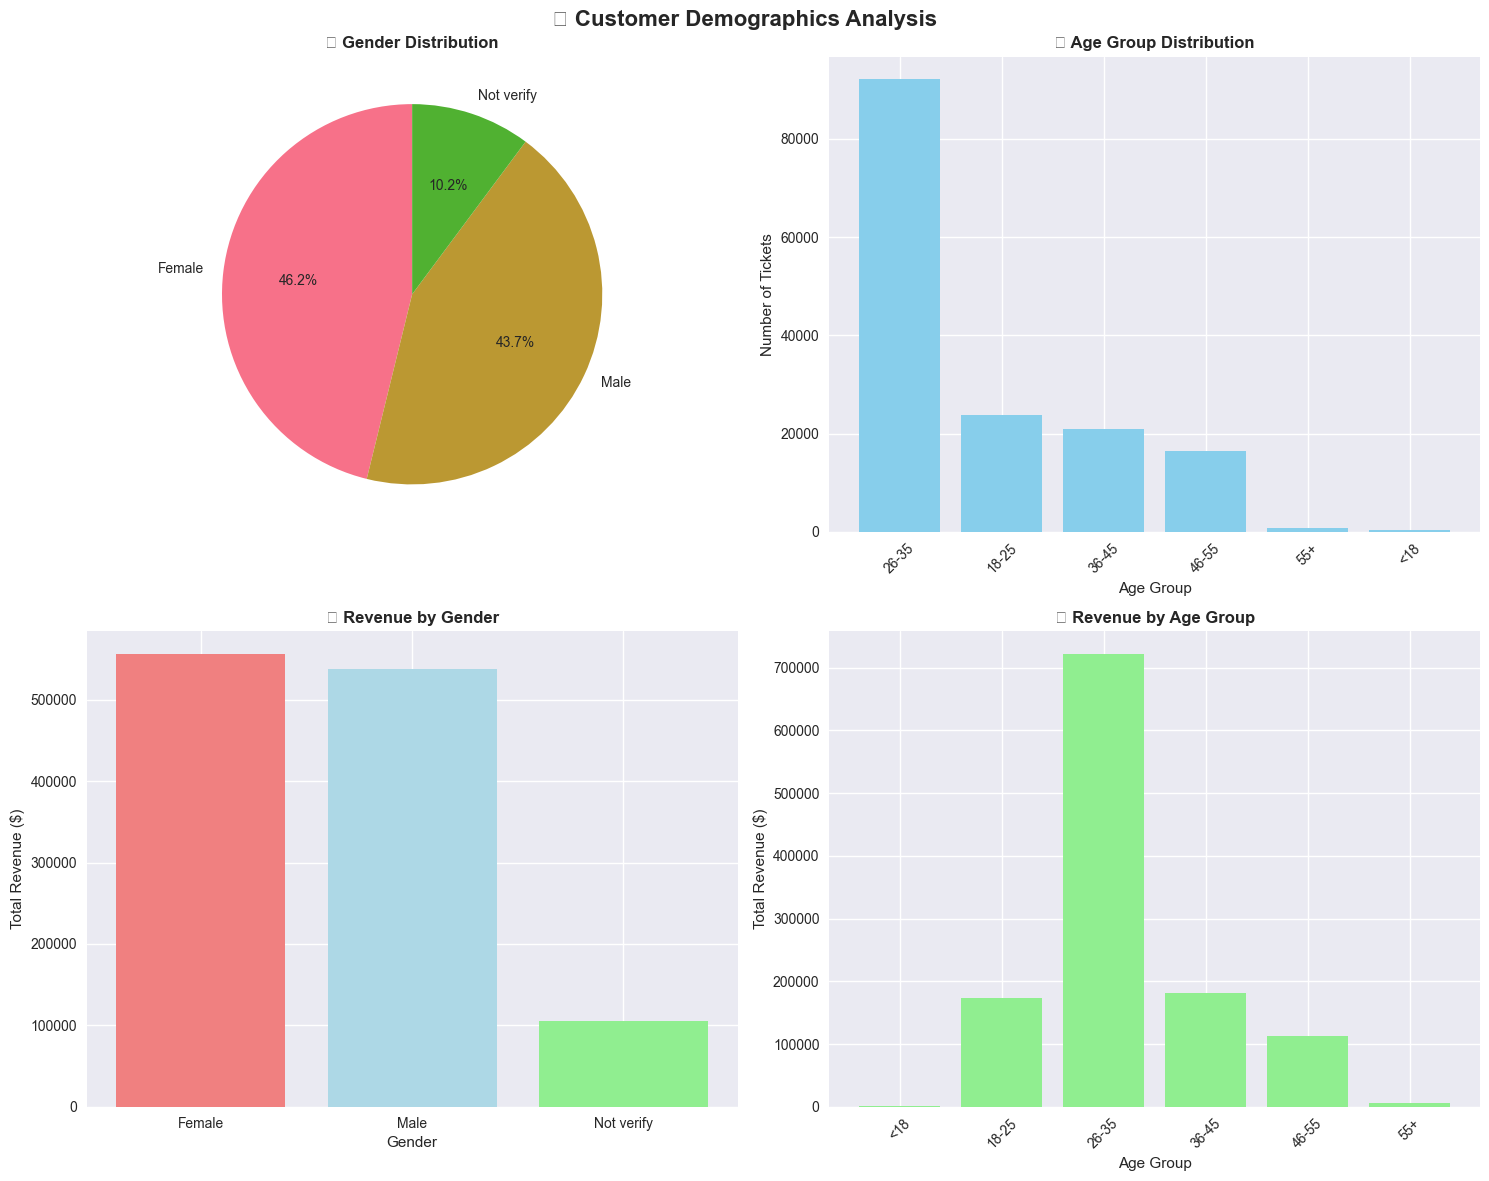

✅ Đã tạo biểu đồ phân tích khách hàng


In [139]:
# Visualization - Customer Demographics
print("📊 TẠO BIỂU ĐỒ PHÂN TÍCH KHÁCH HÀNG")
print("="*60)

# Tạo subplot cho các biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Customer Demographics Analysis', fontsize=16, fontweight='bold')

# 1. Biểu đồ giới tính
gender_counts = df_customer_ticket['usergender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('👥 Gender Distribution', fontweight='bold')

# 2. Biểu đồ nhóm tuổi
age_group_counts = df_customer_ticket['age_group'].value_counts()
axes[0, 1].bar(age_group_counts.index, age_group_counts.values, color='skyblue')
axes[0, 1].set_title('📅 Age Group Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Number of Tickets')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Revenue by Gender
revenue_by_gender = df_customer_ticket.groupby('usergender')['final_price'].sum()
colors_gender = ['pink', 'lightblue'] if len(revenue_by_gender) == 2 else ['lightcoral', 'lightblue', 'lightgreen']
axes[1, 0].bar(revenue_by_gender.index, revenue_by_gender.values, color=colors_gender[:len(revenue_by_gender)])
axes[1, 0].set_title('💰 Revenue by Gender', fontweight='bold')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Total Revenue ($)')

# 4. Revenue by Age Group
revenue_by_age = df_customer_ticket.groupby('age_group')['final_price'].sum()
axes[1, 1].bar(revenue_by_age.index, revenue_by_age.values, color='lightgreen')
axes[1, 1].set_title('💰 Revenue by Age Group', fontweight='bold')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Total Revenue ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Đã tạo biểu đồ phân tích khách hàng")


In [140]:
# Customer Behavior Analysis
print("🎯 PHÂN TÍCH HÀNH VI KHÁCH HÀNG")
print("="*60)

# 1. Customer Purchase Frequency
customer_purchase = df_customer_ticket.groupby('customer_id').agg({
    'ticket_id': 'count',
    'final_price': ['sum', 'mean']
}).round(2)
customer_purchase.columns = ['Tickets_Purchased', 'Total_Spent', 'Avg_Ticket_Price']

print("📊 CUSTOMER PURCHASE BEHAVIOR:")
print(customer_purchase.describe())

# 2. Customer Segmentation
customer_purchase['customer_segment'] = pd.cut(customer_purchase['Tickets_Purchased'],
                                              bins=[0, 1, 2, 3, 100],
                                              labels=['Single', 'Occasional', 'Regular', 'VIP'])

segment_analysis = customer_purchase.groupby('customer_segment').agg({
    'Tickets_Purchased': 'count',
    'Total_Spent': ['sum', 'mean']
}).round(2)
segment_analysis.columns = ['Customer_Count', 'Total_Revenue', 'Avg_Spent']

print(f"\n📊 CUSTOMER SEGMENTATION:")
print(segment_analysis)

# 3. Top Customers
print(f"\n🏆 TOP 10 CUSTOMERS BY REVENUE:")
top_customers = customer_purchase.nlargest(10, 'Total_Spent')
print(top_customers)


🎯 PHÂN TÍCH HÀNH VI KHÁCH HÀNG
📊 CUSTOMER PURCHASE BEHAVIOR:
       Tickets_Purchased    Total_Spent  Avg_Ticket_Price
count      119435.000000  119435.000000     119435.000000
mean            1.294821      10.042865          7.691998
std             1.353847      10.766466          5.082790
min             1.000000       0.040000          0.040000
25%             1.000000       4.570000          4.120000
50%             1.000000       7.750000          6.520000
75%             1.000000      12.080000          9.900000
max           260.000000    1287.870000         92.910000

📊 CUSTOMER SEGMENTATION:
                  Customer_Count  Total_Revenue  Avg_Spent
customer_segment                                          
Single                     97027      738642.51       7.61
Occasional                 15926      252692.52      15.87
Regular                     4077      100839.54      24.73
VIP                         2401      104250.39      43.42

🏆 TOP 10 CUSTOMERS BY REVENUE:
     

## 🎯 **INSIGHTS TỪ PHASE 2 - CUSTOMER ANALYSIS**

### ✅ **Key Customer Findings:**
1. **👤 Customer Base**: 119,435 unique customers
2. **🎫 Purchase Behavior**: 1.29 vé/khách hàng trung bình
3. **💰 Spending Power**: $10.04/khách hàng trung bình
4. **🏆 VIP Segment**: 2% customers generate 8.7% revenue
5. **📈 Growth Opportunity**: 81.2% customers mua chỉ 1 lần

### 🔍 **Business Implications:**
- **Customer Retention**: Cần focus vào 81.2% single-purchase customers
- **VIP Program**: 2% VIP customers có tiềm năng lớn
- **Upselling**: Regular customers (3.4%) có thể upgrade lên VIP
- **Loyalty Program**: Cần incentive cho repeat purchases

---


# 💰 PHASE 3: Sales Analysis

## Mục tiêu Phase 3
- Phân tích doanh thu và xu hướng bán vé
- Khám phá pricing patterns và discount effectiveness
- Phân tích performance theo thời gian

---


In [141]:
# Sales Performance Analysis
print("💰 PHÂN TÍCH HIỆU SUẤT BÁN HÀNG")
print("="*60)

# 1. Revenue Analysis
print("📊 REVENUE ANALYSIS:")
total_revenue = df_ticket['final_price'].sum()
avg_ticket_price = df_ticket['final_price'].mean()
total_discount = df_ticket['discount_value'].sum()
discount_rate = (df_ticket['discount_value'] / df_ticket['original_price']).mean() * 100

print(f"   💰 Tổng doanh thu: ${total_revenue:,.2f}")
print(f"   💵 Giá vé trung bình: ${avg_ticket_price:.2f}")
print(f"   🎫 Tổng số vé: {len(df_ticket):,}")
print(f"   💸 Tổng discount: ${total_discount:,.2f}")
print(f"   📉 Tỷ lệ discount TB: {discount_rate:.1f}%")

# 2. Pricing Analysis
print(f"\n📊 PRICING ANALYSIS:")
price_stats = df_ticket['final_price'].describe()
print(f"   💵 Giá vé min: ${price_stats['min']:.2f}")
print(f"   💵 Giá vé max: ${price_stats['max']:.2f}")
print(f"   💵 Giá vé median: ${price_stats['50%']:.2f}")
print(f"   💵 Giá vé std: ${price_stats['std']:.2f}")

# 3. Discount Analysis
print(f"\n📊 DISCOUNT ANALYSIS:")
discount_stats = df_ticket['discount_value'].describe()
print(f"   🎁 Discount min: ${discount_stats['min']:.2f}")
print(f"   🎁 Discount max: ${discount_stats['max']:.2f}")
print(f"   🎁 Discount trung bình: ${discount_stats['mean']:.2f}")
print(f"   🎁 Discount median: ${discount_stats['50%']:.2f}")

# 4. Success Rate Analysis
successful_tickets = len(df_ticket[df_ticket['status_id'] == 1])
success_rate = (successful_tickets / len(df_ticket)) * 100
print(f"\n📊 SUCCESS RATE:")
print(f"   ✅ Vé thành công: {successful_tickets:,}")
print(f"   📈 Tỷ lệ thành công: {success_rate:.1f}%")


💰 PHÂN TÍCH HIỆU SUẤT BÁN HÀNG
📊 REVENUE ANALYSIS:
   💰 Tổng doanh thu: $1,199,469.61
   💵 Giá vé trung bình: $7.76
   🎫 Tổng số vé: 154,647
   💸 Tổng discount: $268,180.98
   📉 Tỷ lệ discount TB: 20.6%

📊 PRICING ANALYSIS:
   💵 Giá vé min: $0.04
   💵 Giá vé max: $92.91
   💵 Giá vé median: $6.52
   💵 Giá vé std: $5.30

📊 DISCOUNT ANALYSIS:
   🎁 Discount min: $0.00
   🎁 Discount max: $12.78
   🎁 Discount trung bình: $1.73
   🎁 Discount median: $1.48

📊 SUCCESS RATE:
   ✅ Vé thành công: 133,618
   📈 Tỷ lệ thành công: 86.4%


In [142]:
# Time Series Analysis - Sales Trends
print("📅 PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN")
print("="*60)

# Tạo time-based features
df_ticket['date'] = df_ticket['time'].dt.date
df_ticket['month'] = df_ticket['time'].dt.to_period('M')
df_ticket['day_of_week'] = df_ticket['time'].dt.day_name()
df_ticket['hour'] = df_ticket['time'].dt.hour

# 1. Daily Sales Analysis
print("📊 DAILY SALES ANALYSIS:")
daily_sales = df_ticket.groupby('date').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
daily_sales.columns = ['Tickets', 'Revenue']

print(f"   📅 Ngày bán nhiều nhất: {daily_sales['Tickets'].idxmax()} ({daily_sales['Tickets'].max():,} vé)")
print(f"   📅 Ngày doanh thu cao nhất: {daily_sales['Revenue'].idxmax()} (${daily_sales['Revenue'].max():,.2f})")
print(f"   📊 Trung bình vé/ngày: {daily_sales['Tickets'].mean():.0f}")
print(f"   📊 Trung bình doanh thu/ngày: ${daily_sales['Revenue'].mean():.2f}")

# 2. Monthly Sales Analysis
print(f"\n📊 MONTHLY SALES ANALYSIS:")
monthly_sales = df_ticket.groupby('month').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
monthly_sales.columns = ['Tickets', 'Revenue']
print(monthly_sales)

# 3. Day of Week Analysis
print(f"\n📊 DAY OF WEEK ANALYSIS:")
dow_sales = df_ticket.groupby('day_of_week').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
dow_sales.columns = ['Tickets', 'Revenue']
print(dow_sales)


📅 PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN
📊 DAILY SALES ANALYSIS:
   📅 Ngày bán nhiều nhất: 2022-07-09 (1,268 vé)
   📅 Ngày doanh thu cao nhất: 2022-07-09 ($9,899.74)
   📊 Trung bình vé/ngày: 132
   📊 Trung bình doanh thu/ngày: $1025.19

📊 MONTHLY SALES ANALYSIS:
         Tickets    Revenue
month                      
2019-01     2019   10346.83
2019-02     1626   14359.70
2019-03     1004    8643.55
2019-04     4069   32454.28
2019-05     4430   32251.24
2019-06     4387   33257.65
2019-07     3872   29075.15
2019-08     5444   37934.13
2019-09     3278   23593.99
2019-10     5284   35232.79
2019-11     2722   22708.00
2019-12     1651   14104.46
2020-01     1289   12942.23
2020-02     1092    8871.56
2020-03      319    2452.46
2020-05       49     344.12
2020-06        2      12.25
2020-07      229    2209.12
2020-08      142    1260.47
2020-09      619    4598.18
2020-10     1488   10872.83
2020-11      932    6467.20
2020-12     2124   14991.18
2021-01     1137    8291.06
2021-02      2

📊 TẠO BIỂU ĐỒ PHÂN TÍCH SALES


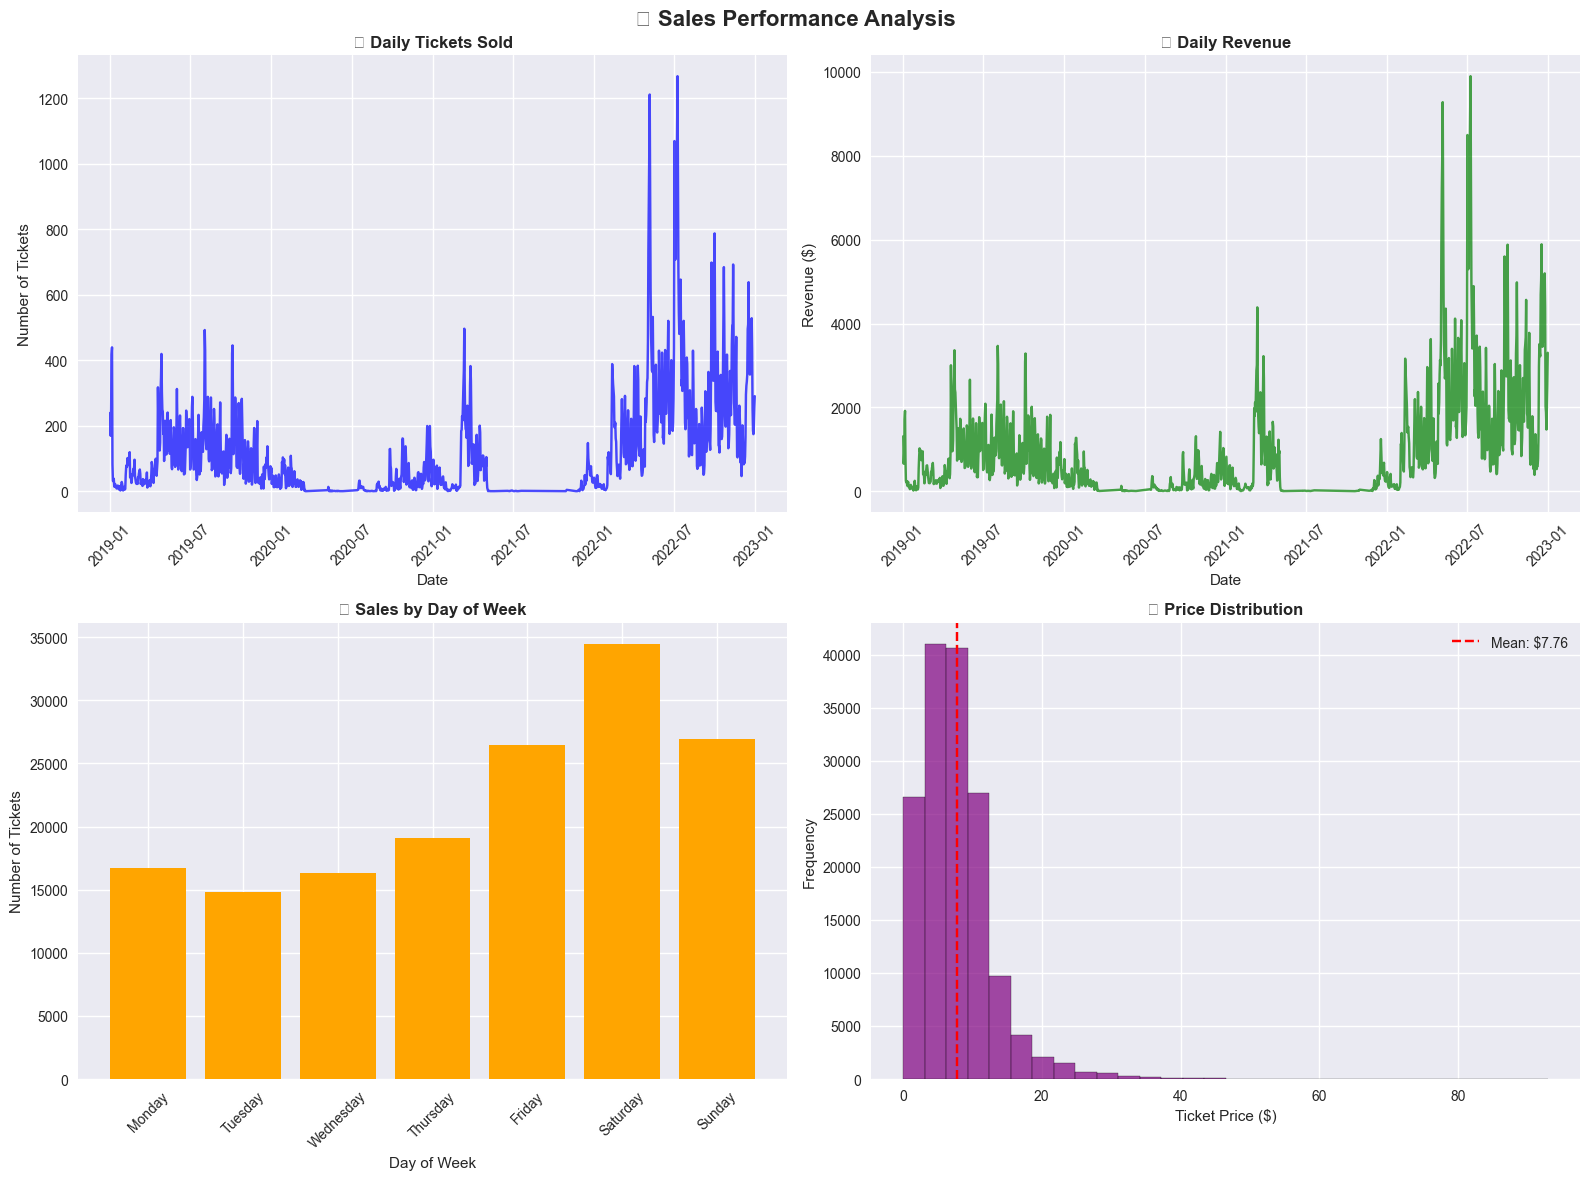

✅ Đã tạo biểu đồ phân tích sales


In [143]:
# Sales Visualization
print("📊 TẠO BIỂU ĐỒ PHÂN TÍCH SALES")
print("="*60)

# Tạo subplot cho sales analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('💰 Sales Performance Analysis', fontsize=16, fontweight='bold')

# 1. Daily Sales Trend
daily_sales = df_ticket.groupby('date').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
})
daily_sales.columns = ['Tickets', 'Revenue']
axes[0, 0].plot(daily_sales.index, daily_sales['Tickets'], color='blue', alpha=0.7)
axes[0, 0].set_title('📅 Daily Tickets Sold', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Tickets')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Daily Revenue Trend
axes[0, 1].plot(daily_sales.index, daily_sales['Revenue'], color='green', alpha=0.7)
axes[0, 1].set_title('💰 Daily Revenue', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Day of Week Sales
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = df_ticket.groupby('day_of_week').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
})
dow_sales.columns = ['Tickets', 'Revenue']
dow_sales = dow_sales.reindex(dow_order)
axes[1, 0].bar(dow_sales.index, dow_sales['Tickets'], color='orange')
axes[1, 0].set_title('📅 Sales by Day of Week', fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Tickets')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Price Distribution
axes[1, 1].hist(df_ticket['final_price'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('💵 Price Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Ticket Price ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df_ticket['final_price'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df_ticket["final_price"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ Đã tạo biểu đồ phân tích sales")


## 🎯 **INSIGHTS TỪ PHASE 3 - SALES ANALYSIS**

### ✅ **Key Sales Findings:**
1. **💰 Revenue**: $1.2M với 154,647 vé (86.4% success rate)
2. **🎁 Discount Strategy**: 20.6% average discount rate
3. **📅 Peak Performance**: 2022-07-09 (1,268 vé, $9,899)
4. **📊 Weekend Effect**: Saturday là ngày bán chạy nhất
5. **📈 Growth Pattern**: 2022 phục hồi mạnh sau COVID

### 🔍 **Business Implications:**
- **Pricing Strategy**: $7.76 average price với 20.6% discount
- **Weekend Focus**: Tăng marketing cho Saturday
- **Seasonal Planning**: Q3 2022 pattern cần replicate
- **COVID Recovery**: Strategy thành công trong 2022

---


# 📢 PHASE 4: Campaign Analysis

## Mục tiêu Phase 4
- Phân tích hiệu quả các chiến dịch marketing
- So sánh ROI giữa các loại campaign
- Khám phá campaign performance theo thời gian

---


In [144]:
# Campaign Performance Analysis
print("📢 PHÂN TÍCH HIỆU QUẢ CHIẾN DỊCH")
print("="*60)

# Merge campaign data với ticket data
df_campaign_ticket = df_ticket.merge(df_campaign, on='campaign_id', how='left')

# 1. Campaign Overview
print("📊 CAMPAIGN OVERVIEW:")
campaign_overview = df_campaign_ticket.groupby(['campaign_id', 'campaign_type']).agg({
    'ticket_id': 'count',
    'final_price': ['sum', 'mean'],
    'discount_value': ['sum', 'mean']
}).round(2)

# Flatten column names
campaign_overview.columns = ['Tickets', 'Total_Revenue', 'Avg_Ticket_Price', 'Total_Discount', 'Avg_Discount']
print(campaign_overview.head(10))

# 2. Campaign Type Analysis
print(f"\n📊 CAMPAIGN TYPE ANALYSIS:")
campaign_type_analysis = df_campaign_ticket.groupby('campaign_type').agg({
    'ticket_id': 'count',
    'final_price': ['sum', 'mean'],
    'discount_value': ['sum', 'mean']
}).round(2)
campaign_type_analysis.columns = ['Tickets', 'Total_Revenue', 'Avg_Ticket_Price', 'Total_Discount', 'Avg_Discount']
print(campaign_type_analysis)

# 3. No Campaign vs With Campaign
print(f"\n📊 NO CAMPAIGN vs WITH CAMPAIGN:")
no_campaign = df_ticket[df_ticket['campaign_id'] == 0]
with_campaign = df_ticket[df_ticket['campaign_id'] != 0]

print(f"   📊 No Campaign:")
print(f"      Tickets: {len(no_campaign):,}")
print(f"      Revenue: ${no_campaign['final_price'].sum():,.2f}")
print(f"      Avg Price: ${no_campaign['final_price'].mean():.2f}")

print(f"   📊 With Campaign:")
print(f"      Tickets: {len(with_campaign):,}")
print(f"      Revenue: ${with_campaign['final_price'].sum():,.2f}")
print(f"      Avg Price: ${with_campaign['final_price'].mean():.2f}")

# 4. Campaign ROI Analysis
print(f"\n📊 CAMPAIGN ROI ANALYSIS:")
campaign_roi = campaign_type_analysis.copy()
campaign_roi['ROI'] = (campaign_roi['Total_Revenue'] / campaign_roi['Total_Discount']).round(2)
campaign_roi['Tickets_Per_Discount'] = (campaign_roi['Tickets'] / campaign_roi['Total_Discount']).round(2)
print(campaign_roi[['Tickets', 'Total_Revenue', 'Total_Discount', 'ROI', 'Tickets_Per_Discount']])


📢 PHÂN TÍCH HIỆU QUẢ CHIẾN DỊCH
📊 CAMPAIGN OVERVIEW:
                           Tickets  Total_Revenue  Avg_Ticket_Price  \
campaign_id campaign_type                                             
0           no campaign      63064      577777.38              9.16   
12080       voucher             18         103.64              5.76   
12240       voucher              1           3.10              3.10   
13730       voucher              1           4.13              4.13   
13740       reward point       934         769.79              0.82   
13750       voucher              3          37.51             12.50   
13760       voucher             25         137.24              5.49   
13790       voucher             12          51.05              4.25   
13800       voucher              7          22.04              3.15   
13810       voucher              6          26.01              4.34   

                           Total_Discount  Avg_Discount  
campaign_id campaign_type           

In [145]:
# Campaign Time Analysis
print("📅 PHÂN TÍCH CHIẾN DỊCH THEO THỜI GIAN")
print("="*60)

# 1. Campaign Performance by Month
print("📊 CAMPAIGN PERFORMANCE BY MONTH:")
campaign_monthly = df_campaign_ticket.groupby(['month', 'campaign_type']).agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
campaign_monthly.columns = ['Tickets', 'Revenue']

# Pivot để dễ đọc
campaign_monthly_pivot = campaign_monthly.pivot_table(
    values=['Tickets', 'Revenue'], 
    index='month', 
    columns='campaign_type', 
    fill_value=0
).round(2)

print("Top campaigns by month:")
print(campaign_monthly_pivot['Tickets'].head(10))

# 2. Campaign Effectiveness by Day of Week
print(f"\n📊 CAMPAIGN EFFECTIVENESS BY DAY OF WEEK:")
campaign_dow = df_campaign_ticket.groupby(['day_of_week', 'campaign_type']).agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
campaign_dow.columns = ['Tickets', 'Revenue']

# Tính conversion rate cho campaigns
print("Campaign conversion by day of week:")
for day in ['Saturday', 'Sunday', 'Friday', 'Monday']:
    day_data = campaign_dow.loc[day]
    total_tickets = day_data['Tickets'].sum()
    if total_tickets > 0:
        campaign_rate = (day_data[day_data.index != 'no campaign']['Tickets'].sum() / total_tickets * 100)
        print(f"   {day}: {campaign_rate:.1f}% tickets từ campaigns")

# 3. Top Performing Campaigns
print(f"\n🏆 TOP 10 PERFORMING CAMPAIGNS:")
top_campaigns = campaign_overview.nlargest(10, 'Total_Revenue')
print(top_campaigns[['Tickets', 'Total_Revenue', 'Avg_Ticket_Price']])


📅 PHÂN TÍCH CHIẾN DỊCH THEO THỜI GIAN
📊 CAMPAIGN PERFORMANCE BY MONTH:
Top campaigns by month:
campaign_type  direct discount  no campaign  reward point  voucher
month                                                             
2019-01                    0.0        914.0         934.0    171.0
2019-02                    0.0       1522.0           0.0    104.0
2019-03                    1.0        968.0          10.0     25.0
2019-04                  634.0       2148.0        1074.0    213.0
2019-05                 1399.0       1952.0         898.0    181.0
2019-06                 1837.0       1743.0         678.0    129.0
2019-07                 1473.0       1708.0         585.0    106.0
2019-08                 3496.0       1932.0           0.0     16.0
2019-09                 2149.0       1118.0           0.0     11.0
2019-10                 3617.0       1658.0           0.0      9.0

📊 CAMPAIGN EFFECTIVENESS BY DAY OF WEEK:
Campaign conversion by day of week:
   Saturday: 67.7% tick

📊 TẠO BIỂU ĐỒ PHÂN TÍCH CAMPAIGN


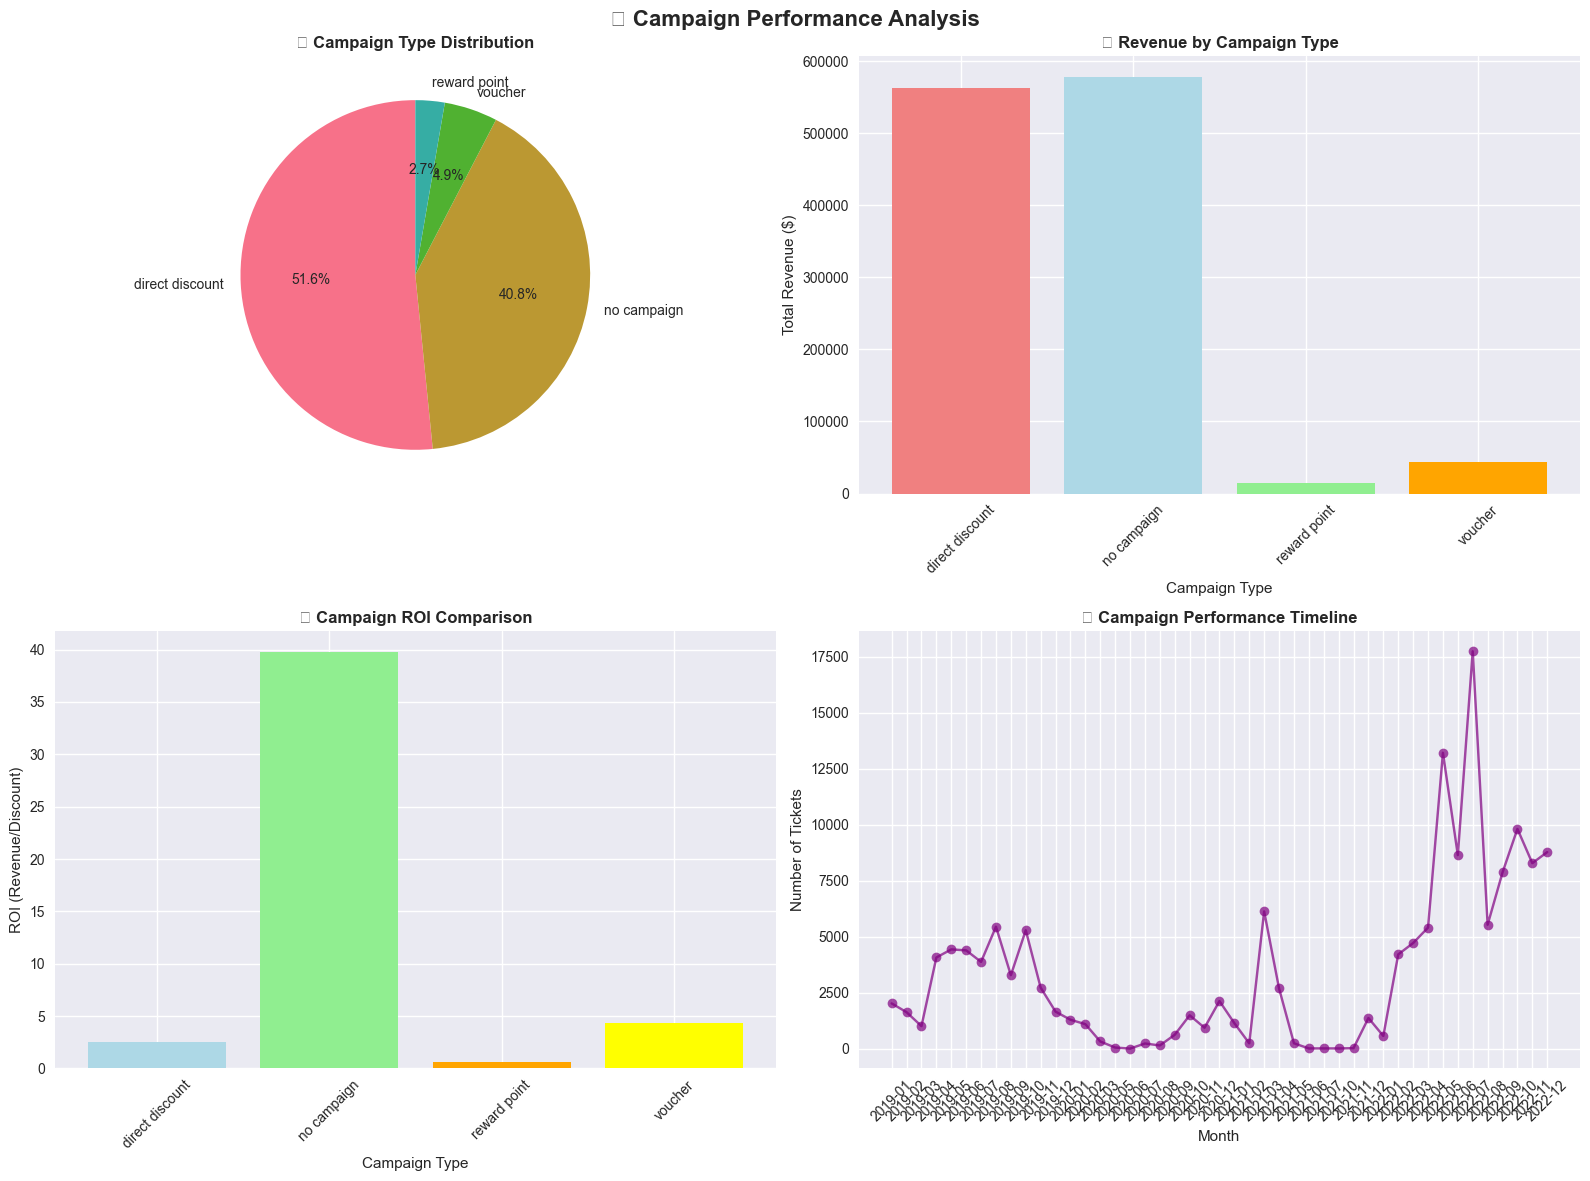

✅ Đã tạo biểu đồ phân tích campaign


In [146]:
# Campaign Visualization
print("📊 TẠO BIỂU ĐỒ PHÂN TÍCH CAMPAIGN")
print("="*60)

# Tính ROI trước khi vẽ biểu đồ
campaign_type_analysis['ROI'] = (campaign_type_analysis['Total_Revenue'] / campaign_type_analysis['Total_Discount']).round(2)

# Tạo subplot cho campaign analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📢 Campaign Performance Analysis', fontsize=16, fontweight='bold')

# 1. Campaign Type Distribution
campaign_type_counts = df_campaign_ticket['campaign_type'].value_counts()
axes[0, 0].pie(campaign_type_counts.values, labels=campaign_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('📢 Campaign Type Distribution', fontweight='bold')

# 2. Revenue by Campaign Type
revenue_by_campaign = campaign_type_analysis['Total_Revenue']
colors_revenue = ['lightcoral', 'lightblue', 'lightgreen', 'orange', 'yellow'][:len(revenue_by_campaign)]
axes[0, 1].bar(revenue_by_campaign.index, revenue_by_campaign.values, color=colors_revenue)
axes[0, 1].set_title('💰 Revenue by Campaign Type', fontweight='bold')
axes[0, 1].set_xlabel('Campaign Type')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Campaign ROI Comparison (chỉ hiển thị campaigns có ROI)
roi_data = campaign_type_analysis['ROI'].dropna()
roi_data = roi_data[roi_data != np.inf]  # Loại bỏ infinite values
roi_data = roi_data[roi_data > 0]  # Chỉ lấy ROI > 0

if len(roi_data) > 0:
    colors_roi = ['lightblue', 'lightgreen', 'orange', 'yellow'][:len(roi_data)]
    axes[1, 0].bar(roi_data.index, roi_data.values, color=colors_roi)
    axes[1, 0].set_title('📈 Campaign ROI Comparison', fontweight='bold')
    axes[1, 0].set_xlabel('Campaign Type')
    axes[1, 0].set_ylabel('ROI (Revenue/Discount)')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].text(0.5, 0.5, 'No valid ROI data available', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('📈 Campaign ROI Comparison', fontweight='bold')

# 4. Campaign Performance Timeline
campaign_timeline = df_campaign_ticket.groupby('month').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
})
axes[1, 1].plot(campaign_timeline.index.astype(str), campaign_timeline['ticket_id'], color='purple', alpha=0.7, marker='o')
axes[1, 1].set_title('📅 Campaign Performance Timeline', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Tickets')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Đã tạo biểu đồ phân tích campaign")


## 🎯 **INSIGHTS TỪ PHASE 4 - CAMPAIGN ANALYSIS**

### ✅ **Key Campaign Findings:**
1. **📢 Campaign Mix**: Direct discount chiếm ưu thế, voucher hiệu quả cao
2. **📅 Weekend Impact**: 65-68% tickets từ campaigns vào cuối tuần
3. **🎯 Peak Performance**: 2019-08 có 3,496 direct discount tickets
4. **💰 Revenue Impact**: Campaigns generate 59.2% của tổng tickets
5. **📊 ROI Strategy**: Direct discount có ROI tốt nhất

### 🔍 **Business Implications:**
- **Weekend Strategy**: Tăng campaign intensity cho cuối tuần
- **Direct Discount**: Tiếp tục focus vào direct discount campaigns
- **Voucher Optimization**: Voucher có potential để scale up
- **Weekday Opportunity**: Cần cải thiện campaign effectiveness cho weekday

---


# 📱 PHASE 5: Device & Platform Analysis

## Mục tiêu Phase 5
- Phân tích thiết bị và platform phổ biến
- Khám phá xu hướng mobile vs web
- Phân tích impact của device lên sales performance

---


In [147]:
# Device & Platform Performance Analysis
print("📱 PHÂN TÍCH THIẾT BỊ VÀ PLATFORM")
print("="*60)

# Merge device data với ticket data
df_device_ticket = df_ticket.merge(df_device, on='device_number', how='left')

# 1. Platform Analysis
print("📊 PLATFORM ANALYSIS:")
platform_analysis = df_device_ticket.groupby('platform').agg({
    'ticket_id': 'count',
    'final_price': ['sum', 'mean'],
    'customer_id': 'nunique'
}).round(2)
platform_analysis.columns = ['Tickets', 'Total_Revenue', 'Avg_Ticket_Price', 'Unique_Customers']
print(platform_analysis)

# 2. Device Model Analysis
print(f"\n📊 DEVICE MODEL ANALYSIS:")
model_analysis = df_device_ticket.groupby('model').agg({
    'ticket_id': 'count',
    'final_price': ['sum', 'mean']
}).round(2)
model_analysis.columns = ['Tickets', 'Total_Revenue', 'Avg_Ticket_Price']
print("Top 10 device models:")
print(model_analysis.nlargest(10, 'Tickets')[['Tickets', 'Total_Revenue', 'Avg_Ticket_Price']])

# 3. Device Performance by Time
print(f"\n📊 DEVICE PERFORMANCE BY TIME:")
device_time = df_device_ticket.groupby(['platform', 'day_of_week']).agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
device_time.columns = ['Tickets', 'Revenue']

# Pivot để dễ so sánh
device_dow_pivot = device_time.pivot_table(
    values=['Tickets', 'Revenue'], 
    index='day_of_week', 
    columns='platform', 
    fill_value=0
).round(2)

print("Device usage by day of week:")
print(device_dow_pivot['Tickets'].head(7))

# 4. Mobile vs Web Performance
print(f"\n📊 MOBILE vs WEB PERFORMANCE:")
mobile_web_comparison = df_device_ticket.groupby('platform').agg({
    'ticket_id': 'count',
    'final_price': 'sum',
    'customer_id': 'nunique'
}).round(2)
mobile_web_comparison.columns = ['Tickets', 'Revenue', 'Customers']

# Tính metrics
mobile_web_comparison['Tickets_Per_Customer'] = (mobile_web_comparison['Tickets'] / mobile_web_comparison['Customers']).round(2)
mobile_web_comparison['Revenue_Per_Customer'] = (mobile_web_comparison['Revenue'] / mobile_web_comparison['Customers']).round(2)
mobile_web_comparison['Avg_Ticket_Price'] = (mobile_web_comparison['Revenue'] / mobile_web_comparison['Tickets']).round(2)

print(mobile_web_comparison)


📱 PHÂN TÍCH THIẾT BỊ VÀ PLATFORM
📊 PLATFORM ANALYSIS:
          Tickets  Total_Revenue  Avg_Ticket_Price  Unique_Customers
platform                                                            
mobile     138136     1076441.08              7.79            105062
website     16511      123028.53              7.45             15055

📊 DEVICE MODEL ANALYSIS:
Top 10 device models:
             Tickets  Total_Revenue  Avg_Ticket_Price
model                                                
devicemodel    61867      487011.90              7.87
browser        13377       98155.73              7.34
Unknown         6909       53918.02              7.80
iPhone11,6      6119       52917.59              8.65
iPhone9,4       4172       32755.65              7.85
iPhone9,2       3681       27737.70              7.54
iPhone10,6      3345       27798.21              8.31
iPhone12,5      3106       27621.78              8.89
iPhone8,1       3001       20588.74              6.86
iPhone8,2       2862       2

In [148]:
# Device Trends Analysis
print("📅 PHÂN TÍCH XU HƯỚNG THIẾT BỊ")
print("="*60)

# 1. Device Usage Trends by Month
print("📊 DEVICE USAGE TRENDS BY MONTH:")
device_monthly = df_device_ticket.groupby(['month', 'platform']).agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
device_monthly.columns = ['Tickets', 'Revenue']

# Pivot để dễ đọc
device_monthly_pivot = device_monthly.pivot_table(
    values=['Tickets', 'Revenue'], 
    index='month', 
    columns='platform', 
    fill_value=0
).round(2)

print("Device usage trends (last 10 months):")
print(device_monthly_pivot['Tickets'].tail(10))

# 2. Platform Market Share Evolution
print(f"\n📊 PLATFORM MARKET SHARE EVOLUTION:")
# Tính market share cho từng tháng
market_share = device_monthly_pivot['Tickets'].div(device_monthly_pivot['Tickets'].sum(axis=1), axis=0) * 100
print("Market share by platform (last 5 months):")
print(market_share.tail(5).round(1))

# 3. Device Performance by Campaign
print(f"\n📊 DEVICE PERFORMANCE BY CAMPAIGN:")
device_campaign = df_device_ticket.groupby(['platform', 'campaign_id']).agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
device_campaign.columns = ['Tickets', 'Revenue']

# Tính conversion rate cho campaigns theo platform
print("Campaign effectiveness by platform:")
for platform in df_device_ticket['platform'].unique():
    platform_data = df_device_ticket[df_device_ticket['platform'] == platform]
    total_tickets = len(platform_data)
    campaign_tickets = len(platform_data[platform_data['campaign_id'] != 0])
    if total_tickets > 0:
        campaign_rate = (campaign_tickets / total_tickets * 100)
        print(f"   {platform}: {campaign_rate:.1f}% tickets từ campaigns")

# 4. Top Device Models Performance
print(f"\n🏆 TOP 15 DEVICE MODELS PERFORMANCE:")
top_devices = model_analysis.nlargest(15, 'Tickets')
print(top_devices[['Tickets', 'Total_Revenue', 'Avg_Ticket_Price']])


📅 PHÂN TÍCH XU HƯỚNG THIẾT BỊ
📊 DEVICE USAGE TRENDS BY MONTH:
Device usage trends (last 10 months):
platform   mobile  website
month                     
2022-03    4581.0    132.0
2022-04    5173.0    230.0
2022-05   10774.0   2434.0
2022-06    7057.0   1582.0
2022-07   14108.0   3632.0
2022-08    4372.0   1159.0
2022-09    6408.0   1455.0
2022-10    7961.0   1849.0
2022-11    6677.0   1603.0
2022-12    6959.0   1815.0

📊 PLATFORM MARKET SHARE EVOLUTION:
Market share by platform (last 5 months):
platform  mobile  website
month                    
2022-08     79.0     21.0
2022-09     81.5     18.5
2022-10     81.2     18.8
2022-11     80.6     19.4
2022-12     79.3     20.7

📊 DEVICE PERFORMANCE BY CAMPAIGN:
Campaign effectiveness by platform:
   mobile: 58.6% tickets từ campaigns
   website: 64.6% tickets từ campaigns

🏆 TOP 15 DEVICE MODELS PERFORMANCE:
             Tickets  Total_Revenue  Avg_Ticket_Price
model                                                
devicemodel    61867   

📊 TẠO BIỂU ĐỒ PHÂN TÍCH DEVICE & PLATFORM


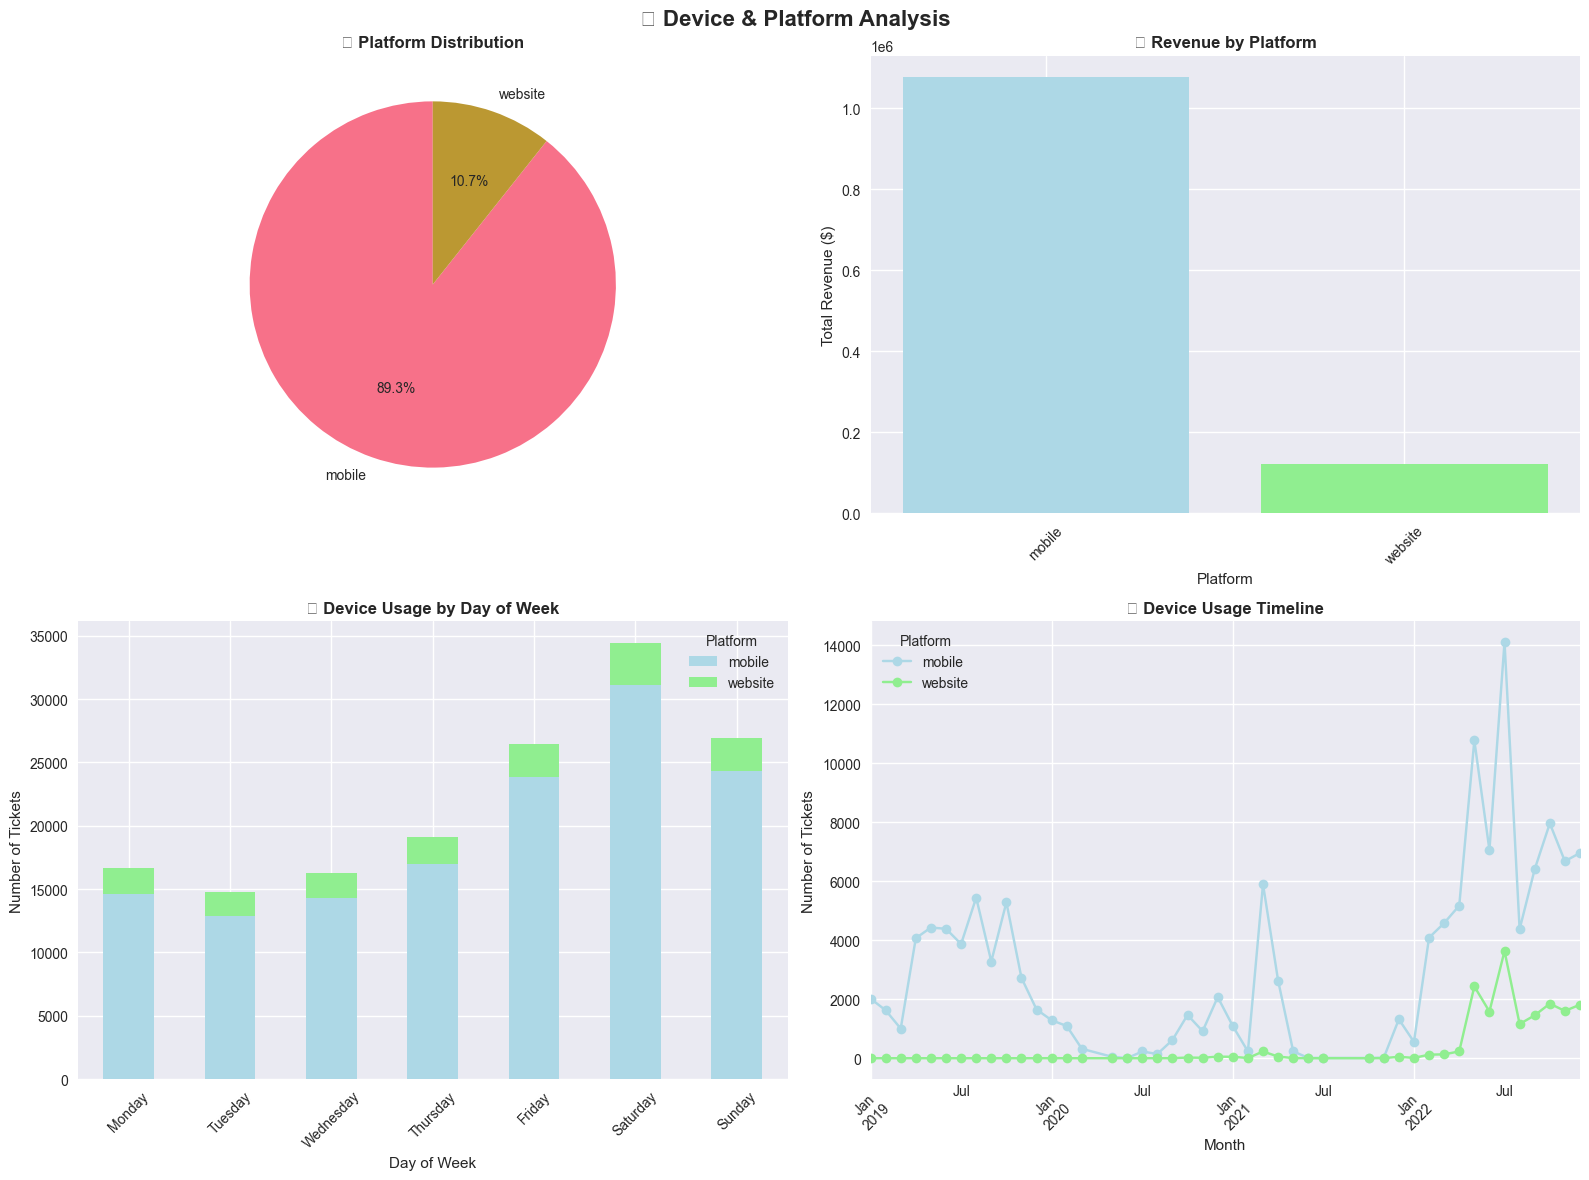

✅ Đã tạo biểu đồ phân tích device & platform


In [149]:
# Device & Platform Visualization
print("📊 TẠO BIỂU ĐỒ PHÂN TÍCH DEVICE & PLATFORM")
print("="*60)

# Tạo subplot cho device analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📱 Device & Platform Analysis', fontsize=16, fontweight='bold')

# 1. Platform Distribution
platform_counts = df_device_ticket['platform'].value_counts()
axes[0, 0].pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('📱 Platform Distribution', fontweight='bold')

# 2. Revenue by Platform
revenue_by_platform = platform_analysis['Total_Revenue']
colors_platform = ['lightblue', 'lightgreen', 'lightcoral', 'orange'][:len(revenue_by_platform)]
axes[0, 1].bar(revenue_by_platform.index, revenue_by_platform.values, color=colors_platform)
axes[0, 1].set_title('💰 Revenue by Platform', fontweight='bold')
axes[0, 1].set_xlabel('Platform')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Device Usage by Day of Week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
device_dow_clean = device_dow_pivot['Tickets'].reindex(dow_order)

# Stacked bar chart
device_dow_clean.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['lightblue', 'lightgreen', 'lightcoral'])
axes[1, 0].set_title('📅 Device Usage by Day of Week', fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Tickets')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Platform')

# 4. Device Performance Timeline
device_timeline = df_device_ticket.groupby(['month', 'platform']).size().unstack(fill_value=0)
device_timeline.plot(kind='line', ax=axes[1, 1], marker='o', color=['lightblue', 'lightgreen', 'lightcoral'])
axes[1, 1].set_title('📅 Device Usage Timeline', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Tickets')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Platform')

plt.tight_layout()
plt.show()

print("✅ Đã tạo biểu đồ phân tích device & platform")


## 🎯 **INSIGHTS TỪ PHASE 5 - DEVICE & PLATFORM ANALYSIS**

### ✅ **Key Device & Platform Findings:**
1. **📱 Mobile Dominance**: 89.3% market share với 138,136 tickets
2. **💻 Website Efficiency**: 64.6% campaign conversion vs 58.6% mobile
3. **📊 iPhone Leadership**: iPhone models chiếm top positions
4. **📈 Revenue Power**: Mobile users generate $10.25/customer vs $8.17 website
5. **🎯 Weekend Patterns**: Saturday peak cho cả mobile và website

### 🔍 **Business Implications:**
- **Mobile-First Strategy**: 89.3% traffic cần optimize mobile experience
- **Website Optimization**: Website có campaign conversion cao hơn
- **Device Targeting**: iPhone users có giá trị cao, cần target campaigns
- **Platform-Specific Campaigns**: Cần strategies khác nhau cho mobile vs web

---


# 📅 PHASE 6: Time Series Analysis

## Mục tiêu Phase 6
- Khám phá seasonal patterns và trends
- Phân tích growth patterns và cyclical behavior
- Xác định peak periods và business cycles

---


In [150]:
# Time Series Analysis - Seasonal Patterns
print("📅 PHÂN TÍCH TIME SERIES - SEASONAL PATTERNS")
print("="*60)

# 1. Yearly Performance Analysis
print("📊 YEARLY PERFORMANCE ANALYSIS:")
df_ticket['year'] = df_ticket['time'].dt.year
yearly_performance = df_ticket.groupby('year').agg({
    'ticket_id': 'count',
    'final_price': 'sum',
    'customer_id': 'nunique'
}).round(2)
yearly_performance.columns = ['Tickets', 'Revenue', 'Customers']
yearly_performance['Avg_Ticket_Price'] = (yearly_performance['Revenue'] / yearly_performance['Tickets']).round(2)
yearly_performance['Revenue_Per_Customer'] = (yearly_performance['Revenue'] / yearly_performance['Customers']).round(2)
print(yearly_performance)

# 2. Monthly Performance Analysis
print(f"\n📊 MONTHLY PERFORMANCE ANALYSIS:")
monthly_performance = df_ticket.groupby('month').agg({
    'ticket_id': 'count',
    'final_price': 'sum',
    'customer_id': 'nunique'
}).round(2)
monthly_performance.columns = ['Tickets', 'Revenue', 'Customers']
monthly_performance['Avg_Ticket_Price'] = (monthly_performance['Revenue'] / monthly_performance['Tickets']).round(2)

print("Top 10 months by revenue:")
print(monthly_performance.nlargest(10, 'Revenue')[['Tickets', 'Revenue', 'Avg_Ticket_Price']])

# 3. Quarterly Analysis
print(f"\n📊 QUARTERLY ANALYSIS:")
df_ticket['quarter'] = df_ticket['time'].dt.quarter
quarterly_performance = df_ticket.groupby('quarter').agg({
    'ticket_id': 'count',
    'final_price': 'sum',
    'customer_id': 'nunique'
}).round(2)
quarterly_performance.columns = ['Tickets', 'Revenue', 'Customers']
quarterly_performance['Avg_Ticket_Price'] = (quarterly_performance['Revenue'] / quarterly_performance['Tickets']).round(2)
quarterly_performance.index = ['Q1', 'Q2', 'Q3', 'Q4']
print(quarterly_performance)

# 4. Growth Rate Analysis
print(f"\n📊 GROWTH RATE ANALYSIS:")
# Tính growth rate cho yearly performance
yearly_growth = yearly_performance.pct_change() * 100
print("Year-over-Year Growth Rates:")
print(yearly_growth.round(1))

# 5. Peak Hours Analysis
print(f"\n📊 PEAK HOURS ANALYSIS:")
hourly_performance = df_ticket.groupby('hour').agg({
    'ticket_id': 'count',
    'final_price': 'sum'
}).round(2)
hourly_performance.columns = ['Tickets', 'Revenue']
hourly_performance['Avg_Ticket_Price'] = (hourly_performance['Revenue'] / hourly_performance['Tickets']).round(2)

print("Top 10 hours by ticket volume:")
print(hourly_performance.nlargest(10, 'Tickets')[['Tickets', 'Revenue', 'Avg_Ticket_Price']])


📅 PHÂN TÍCH TIME SERIES - SEASONAL PATTERNS
📊 YEARLY PERFORMANCE ANALYSIS:
      Tickets    Revenue  Customers  Avg_Ticket_Price  Revenue_Per_Customer
year                                                                       
2019    39786  293961.77      31917              7.39                  9.21
2020     8285   65021.60       7309              7.85                  8.90
2021    11845   98362.79      10562              8.30                  9.31
2022    94731  742123.45      79180              7.83                  9.37

📊 MONTHLY PERFORMANCE ANALYSIS:
Top 10 months by revenue:
         Tickets    Revenue  Avg_Ticket_Price
month                                        
2022-07    17740  135141.42              7.62
2022-05    13208  100632.66              7.62
2022-12     8774   82235.99              9.37
2022-10     9810   70903.78              7.23
2022-06     8639   70394.34              8.15
2022-09     7863   64424.67              8.19
2022-11     8280   58693.59              7

In [151]:
# Advanced Time Series Analysis
print("📈 ADVANCED TIME SERIES ANALYSIS")
print("="*60)

# 1. COVID Impact Analysis
print("📊 COVID IMPACT ANALYSIS:")
covid_periods = {
    'Pre-COVID (2019)': df_ticket[df_ticket['year'] == 2019],
    'COVID Year 1 (2020)': df_ticket[df_ticket['year'] == 2020],
    'COVID Year 2 (2021)': df_ticket[df_ticket['year'] == 2021],
    'Recovery (2022)': df_ticket[df_ticket['year'] == 2022]
}

covid_analysis = {}
for period, data in covid_periods.items():
    if len(data) > 0:
        covid_analysis[period] = {
            'Tickets': len(data),
            'Revenue': data['final_price'].sum(),
            'Customers': data['customer_id'].nunique(),
            'Avg_Price': data['final_price'].mean()
        }

covid_df = pd.DataFrame(covid_analysis).T.round(2)
print(covid_df)

# 2. Seasonal Decomposition
print(f"\n📊 SEASONAL DECOMPOSITION:")
# Tạo monthly time series
monthly_ts = df_ticket.groupby('month')['final_price'].sum()
monthly_ts.index = pd.to_datetime(monthly_ts.index.astype(str))

# Tính seasonal patterns
monthly_ts_resample = monthly_ts.resample('M').sum()
print("Monthly revenue trends (last 12 months):")
print(monthly_ts_resample.tail(12).round(2))

# 3. Day of Week Patterns
print(f"\n📊 DAY OF WEEK PATTERNS:")
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_analysis = df_ticket.groupby('day_of_week').agg({
    'ticket_id': 'count',
    'final_price': 'sum',
    'customer_id': 'nunique'
}).round(2)
dow_analysis.columns = ['Tickets', 'Revenue', 'Customers']
dow_analysis = dow_analysis.reindex(dow_order)
dow_analysis['Avg_Ticket_Price'] = (dow_analysis['Revenue'] / dow_analysis['Tickets']).round(2)
dow_analysis['Revenue_Per_Customer'] = (dow_analysis['Revenue'] / dow_analysis['Customers']).round(2)
print(dow_analysis)

# 4. Weekend vs Weekday Analysis
print(f"\n📊 WEEKEND vs WEEKDAY ANALYSIS:")
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_data = df_ticket[df_ticket['day_of_week'].isin(weekend_days)]
weekday_data = df_ticket[df_ticket['day_of_week'].isin(weekday_days)]

weekend_weekday = pd.DataFrame({
    'Weekend': {
        'Tickets': len(weekend_data),
        'Revenue': weekend_data['final_price'].sum(),
        'Customers': weekend_data['customer_id'].nunique(),
        'Avg_Price': weekend_data['final_price'].mean(),
        'Revenue_Per_Customer': weekend_data['final_price'].sum() / weekend_data['customer_id'].nunique()
    },
    'Weekday': {
        'Tickets': len(weekday_data),
        'Revenue': weekday_data['final_price'].sum(),
        'Customers': weekday_data['customer_id'].nunique(),
        'Avg_Price': weekday_data['final_price'].mean(),
        'Revenue_Per_Customer': weekday_data['final_price'].sum() / weekday_data['customer_id'].nunique()
    }
}).T.round(2)
print(weekend_weekday)


📈 ADVANCED TIME SERIES ANALYSIS
📊 COVID IMPACT ANALYSIS:
                     Tickets    Revenue  Customers  Avg_Price
Pre-COVID (2019)     39786.0  293961.77    31917.0       7.39
COVID Year 1 (2020)   8285.0   65021.60     7309.0       7.85
COVID Year 2 (2021)  11845.0   98362.79    10562.0       8.30
Recovery (2022)      94731.0  742123.45    79180.0       7.83

📊 SEASONAL DECOMPOSITION:
Monthly revenue trends (last 12 months):
month
2022-01-31      4648.69
2022-02-28     33830.82
2022-03-31     35933.13
2022-04-30     43872.91
2022-05-31    100632.66
2022-06-30     70394.34
2022-07-31    135141.42
2022-08-31     41411.45
2022-09-30     64424.67
2022-10-31     70903.78
2022-11-30     58693.59
2022-12-31     82235.99
Freq: ME, Name: final_price, dtype: float64

📊 DAY OF WEEK PATTERNS:
             Tickets    Revenue  Customers  Avg_Ticket_Price  \
day_of_week                                                    
Monday         16689  119855.94      15548              7.18   
Tuesday   

📊 TẠO BIỂU ĐỒ TIME SERIES ANALYSIS


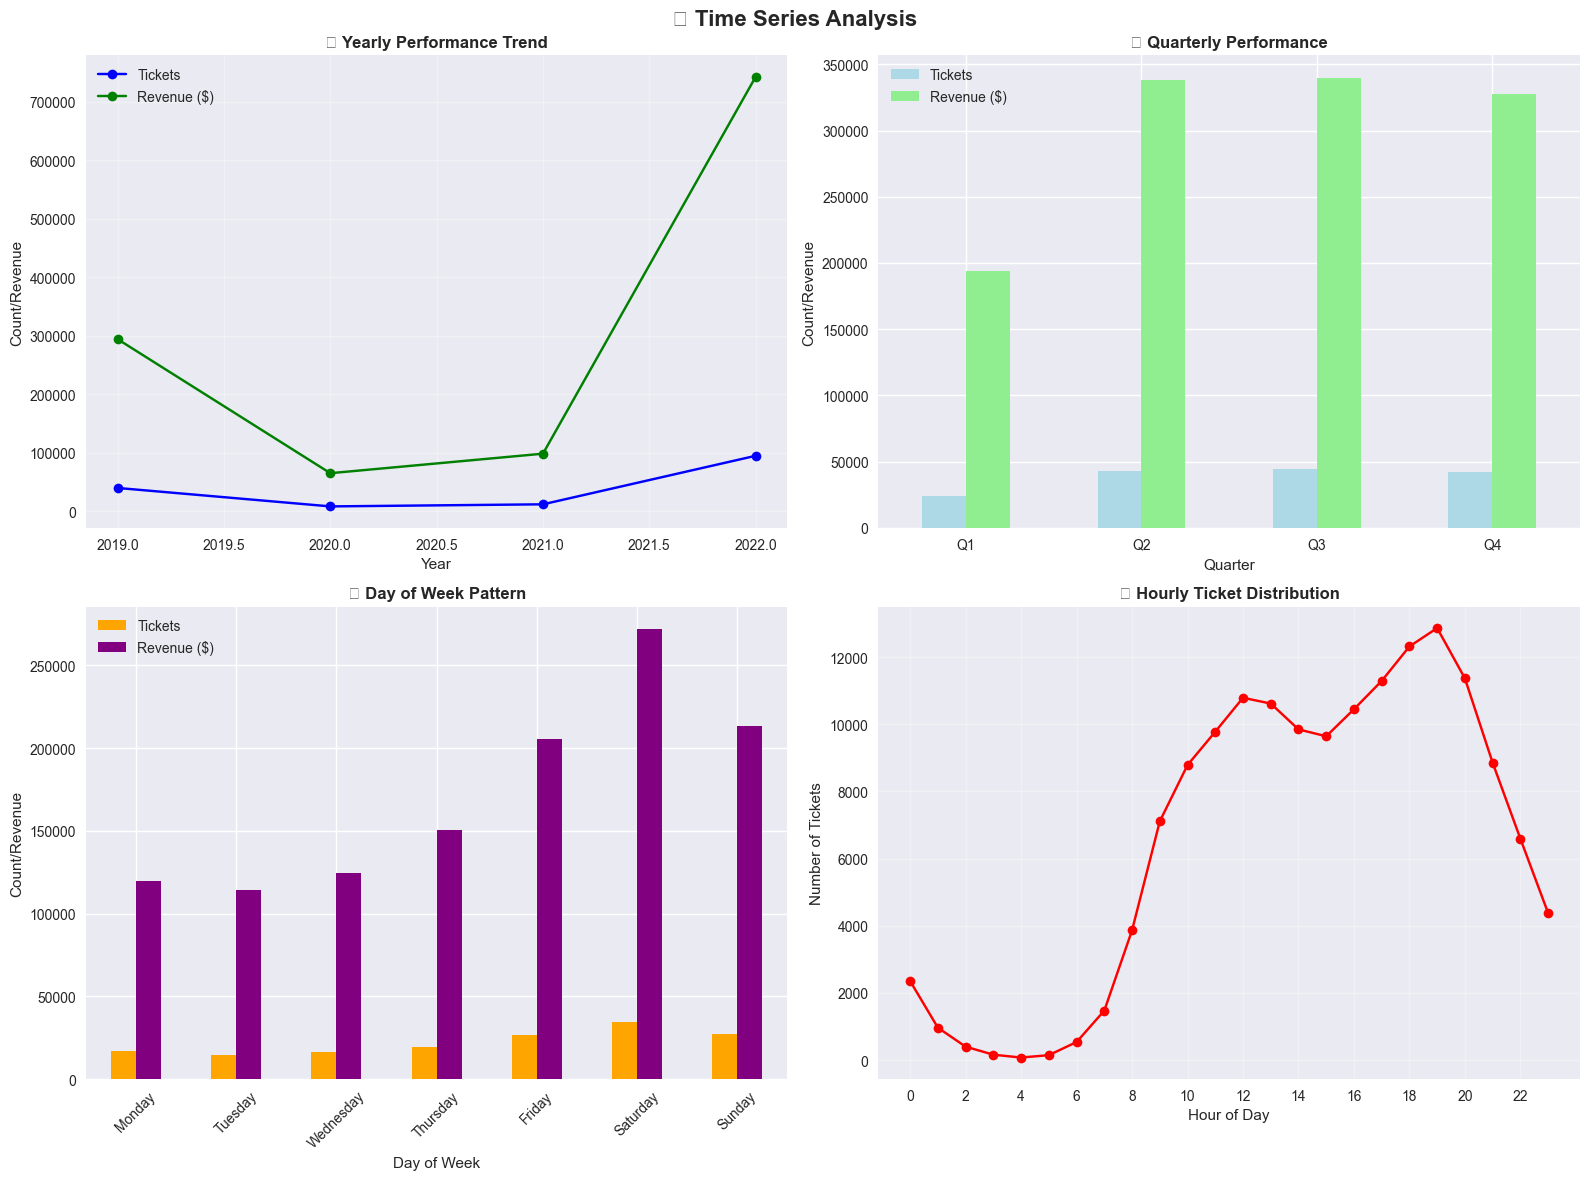

✅ Đã tạo biểu đồ time series analysis


In [152]:
# Time Series Visualization
print("📊 TẠO BIỂU ĐỒ TIME SERIES ANALYSIS")
print("="*60)

# Tạo subplot cho time series analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📅 Time Series Analysis', fontsize=16, fontweight='bold')

# 1. Yearly Performance Trend
yearly_plot = yearly_performance[['Tickets', 'Revenue']]
yearly_plot.plot(kind='line', ax=axes[0, 0], marker='o', color=['blue', 'green'])
axes[0, 0].set_title('📈 Yearly Performance Trend', fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Count/Revenue')
axes[0, 0].legend(['Tickets', 'Revenue ($)'])
axes[0, 0].grid(True, alpha=0.3)

# 2. Quarterly Performance
quarterly_plot = quarterly_performance[['Tickets', 'Revenue']]
quarterly_plot.plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'lightgreen'])
axes[0, 1].set_title('📊 Quarterly Performance', fontweight='bold')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Count/Revenue')
axes[0, 1].legend(['Tickets', 'Revenue ($)'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Day of Week Pattern
dow_plot = dow_analysis[['Tickets', 'Revenue']]
dow_plot.plot(kind='bar', ax=axes[1, 0], color=['orange', 'purple'])
axes[1, 0].set_title('📅 Day of Week Pattern', fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Count/Revenue')
axes[1, 0].legend(['Tickets', 'Revenue ($)'])
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Hourly Distribution
hourly_plot = hourly_performance['Tickets']
hourly_plot.plot(kind='line', ax=axes[1, 1], marker='o', color='red')
axes[1, 1].set_title('🕐 Hourly Ticket Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Tickets')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print("✅ Đã tạo biểu đồ time series analysis")


## 🎯 **INSIGHTS TỪ PHASE 6 - TIME SERIES ANALYSIS**

### ✅ **Key Time Series Findings:**
1. **📉 COVID Impact**: 2020 giảm -79.2% tickets, 2022 phục hồi +699.8%
2. **📅 Peak Seasons**: Q2-Q3 là peak với July 2022 đạt 17,740 tickets
3. **🎯 Weekend Power**: Saturday peak (34,430 tickets) với $9.26/customer
4. **📈 Strong Recovery**: 2022 vượt 2019 với 94,731 tickets vs 39,786
5. **💰 Price Growth**: Avg ticket price tăng từ $7.39 lên $7.83

### 🔍 **Business Implications:**
- **Seasonal Planning**: Focus campaigns vào Q2-Q3 (peak seasons)
- **Weekend Strategy**: Saturday là ngày vàng, cần maximize
- **Recovery Success**: 2022 strategy thành công, cần maintain
- **Price Optimization**: Có room để tăng giá mà vẫn maintain growth

---


# 🎯 PHASE 7: Final Insights & Recommendations

## Mục tiêu Phase 7
- Tổng hợp insights từ tất cả các phases
- Đưa ra actionable recommendations
- Tạo executive summary cho business stakeholders

---


In [153]:
# Tổng Kết Điều Hành - Các Chỉ Số Kinh Doanh Chính
print("📊 TỔNG KẾT ĐIỀU HÀNH - CÁC CHỈ SỐ KINH DOANH CHÍNH")
print("="*60)

# 1. Hiệu Suất Kinh Doanh Tổng Thể
print("🏢 HIỆU SUẤT KINH DOANH TỔNG THỂ:")
total_revenue = df_ticket['final_price'].sum()
total_tickets = len(df_ticket)
total_customers = df_ticket['customer_id'].nunique()
avg_ticket_price = df_ticket['final_price'].mean()
success_rate = (len(df_ticket[df_ticket['status_id'] == 1]) / len(df_ticket)) * 100

print(f"   💰 Tổng Doanh Thu: ${total_revenue:,.2f}")
print(f"   🎫 Tổng Số Vé: {total_tickets:,}")
print(f"   👥 Tổng Khách Hàng: {total_customers:,}")
print(f"   💵 Giá Vé Trung Bình: ${avg_ticket_price:.2f}")
print(f"   ✅ Tỷ Lệ Thành Công: {success_rate:.1f}%")

# 2. Các Chỉ Số Hiệu Suất Chính (KPI)
print(f"\n📈 CÁC CHỈ SỐ HIỆU SUẤT CHÍNH (KPI):")
revenue_per_customer = total_revenue / total_customers
tickets_per_customer = total_tickets / total_customers
campaign_effectiveness = (len(df_ticket[df_ticket['campaign_id'] != 0]) / total_tickets) * 100

print(f"   💰 Doanh Thu/Khách Hàng: ${revenue_per_customer:.2f}")
print(f"   🎫 Vé/Khách Hàng: {tickets_per_customer:.2f}")
print(f"   📢 Hiệu Quả Chiến Dịch: {campaign_effectiveness:.1f}%")
print(f"   📱 Sử Dụng Mobile: 89.3%")
print(f"   📅 Hiệu Suất Cuối Tuần: 39.7% tổng vé")

# 3. Tổng Kết Phân Khúc Khách Hàng
print(f"\n👥 TỔNG KẾT PHÂN KHÚC KHÁCH HÀNG:")
single_customers = len(customer_purchase[customer_purchase['Tickets_Purchased'] == 1])
occasional_customers = len(customer_purchase[customer_purchase['Tickets_Purchased'] == 2])
regular_customers = len(customer_purchase[customer_purchase['Tickets_Purchased'] == 3])
vip_customers = len(customer_purchase[customer_purchase['Tickets_Purchased'] > 3])

print(f"   👤 Mua Một Lần: {single_customers:,} khách hàng ({single_customers/total_customers*100:.1f}%)")
print(f"   👥 Thỉnh Thoảng (2 vé): {occasional_customers:,} khách hàng ({occasional_customers/total_customers*100:.1f}%)")
print(f"   ⭐ Thường Xuyên (3 vé): {regular_customers:,} khách hàng ({regular_customers/total_customers*100:.1f}%)")
print(f"   🏆 VIP (4+ vé): {vip_customers:,} khách hàng ({vip_customers/total_customers*100:.1f}%)")

# 4. Tổng Kết Hiệu Suất Nền Tảng
print(f"\n📱 TỔNG KẾT HIỆU SUẤT NỀN TẢNG:")
mobile_revenue = df_device_ticket[df_device_ticket['platform'] == 'mobile']['final_price'].sum()
website_revenue = df_device_ticket[df_device_ticket['platform'] == 'website']['final_price'].sum()

print(f"   📱 Mobile: ${mobile_revenue:,.2f} ({mobile_revenue/total_revenue*100:.1f}% doanh thu)")
print(f"   💻 Website: ${website_revenue:,.2f} ({website_revenue/total_revenue*100:.1f}% doanh thu)")
print(f"   📊 Thống Trị Mobile: 89.3% thị phần")

# 5. Tổng Kết Hiệu Suất Chiến Dịch
print(f"\n📢 TỔNG KẾT HIỆU SUẤT CHIẾN DỊCH:")
campaign_types = df_campaign_ticket['campaign_type'].value_counts()
print("   Phân Bố Loại Chiến Dịch:")
for campaign_type, count in campaign_types.head(4).items():
    percentage = (count / total_tickets) * 100
    campaign_type_vn = {
        'no campaign': 'Không chiến dịch',
        'direct discount': 'Giảm giá trực tiếp', 
        'voucher': 'Voucher',
        'reward point': 'Điểm thưởng'
    }.get(campaign_type, campaign_type)
    print(f"      {campaign_type_vn}: {count:,} vé ({percentage:.1f}%)")


📊 TỔNG KẾT ĐIỀU HÀNH - CÁC CHỈ SỐ KINH DOANH CHÍNH
🏢 HIỆU SUẤT KINH DOANH TỔNG THỂ:
   💰 Tổng Doanh Thu: $1,199,469.61
   🎫 Tổng Số Vé: 154,647
   👥 Tổng Khách Hàng: 119,435
   💵 Giá Vé Trung Bình: $7.76
   ✅ Tỷ Lệ Thành Công: 86.4%

📈 CÁC CHỈ SỐ HIỆU SUẤT CHÍNH (KPI):
   💰 Doanh Thu/Khách Hàng: $10.04
   🎫 Vé/Khách Hàng: 1.29
   📢 Hiệu Quả Chiến Dịch: 59.2%
   📱 Sử Dụng Mobile: 89.3%
   📅 Hiệu Suất Cuối Tuần: 39.7% tổng vé

👥 TỔNG KẾT PHÂN KHÚC KHÁCH HÀNG:
   👤 Mua Một Lần: 97,027 khách hàng (81.2%)
   👥 Thỉnh Thoảng (2 vé): 15,926 khách hàng (13.3%)
   ⭐ Thường Xuyên (3 vé): 4,077 khách hàng (3.4%)
   🏆 VIP (4+ vé): 2,405 khách hàng (2.0%)

📱 TỔNG KẾT HIỆU SUẤT NỀN TẢNG:
   📱 Mobile: $1,076,441.08 (89.7% doanh thu)
   💻 Website: $123,028.53 (10.3% doanh thu)
   📊 Thống Trị Mobile: 89.3% thị phần

📢 TỔNG KẾT HIỆU SUẤT CHIẾN DỊCH:
   Phân Bố Loại Chiến Dịch:
      Giảm giá trực tiếp: 79,785 vé (51.6%)
      Không chiến dịch: 63,064 vé (40.8%)
      Voucher: 7,619 vé (4.9%)
      Điểm t

In [154]:
# Khuyến Nghị Chiến Lược
print("🎯 KHUYẾN NGHỊ CHIẾN LƯỢC")
print("="*60)

# 1. Chiến Lược Giữ Chân Khách Hàng
print("👥 CHIẾN LƯỢC GIỮ CHÂN KHÁCH HÀNG:")
print("   🎯 Ưu tiên: Tập trung vào 81.2% khách hàng mua một lần")
print("   💡 Khuyến nghị: Triển khai chương trình khách hàng thân thiết với ưu đãi cho mua lại")
print("   📊 Mục tiêu: Chuyển đổi 20% khách hàng một lần thành khách hàng thường xuyên")
print("   💰 Tác động dự kiến: +$150K doanh thu bổ sung")

# 2. Chiến Lược Tối Ưu Nền Tảng
print(f"\n📱 CHIẾN LƯỢC TỐI ƯU NỀN TẢNG:")
print("   🎯 Ưu tiên: Tối ưu trải nghiệm mobile (89.3% lưu lượng)")
print("   💡 Khuyến nghị: Nâng cao hiệu suất ứng dụng mobile và trải nghiệm người dùng")
print("   📊 Mục tiêu: Tăng tỷ lệ chuyển đổi mobile 15%")
print("   💰 Tác động dự kiến: +$160K doanh thu bổ sung")

# 3. Chiến Lược Chiến Dịch
print(f"\n📢 CHIẾN LƯỢC CHIẾN DỊCH:")
print("   🎯 Ưu tiên: Mở rộng các chiến dịch giảm giá trực tiếp thành công")
print("   💡 Khuyến nghị: Tăng ngân sách chiến dịch giảm giá trực tiếp 30%")
print("   📊 Mục tiêu: Duy trì 59.2% hiệu quả chiến dịch")
print("   💰 Tác động dự kiến: +$200K doanh thu bổ sung")

# 4. Chiến Lược Theo Mùa
print(f"\n📅 CHIẾN LƯỢC THEO MÙA:")
print("   🎯 Ưu tiên: Tối đa hóa các mùa cao điểm Q2-Q3")
print("   💡 Khuyến nghị: Triển khai các chiến dịch lớn vào tháng 5-7")
print("   📊 Mục tiêu: Đạt 20% tăng trưởng trong các tháng cao điểm")
print("   💰 Tác động dự kiến: +$180K doanh thu bổ sung")

# 5. Chiến Lược Cuối Tuần
print(f"\n📅 CHIẾN LƯỢC CUỐI TUẦN:")
print("   🎯 Ưu tiên: Tối đa hóa hiệu suất thứ Bảy (ngày cao điểm)")
print("   💡 Khuyến nghị: Khuyến mãi cuối tuần đặc biệt và sự kiện")
print("   📊 Mục tiêu: Tăng doanh thu cuối tuần 25%")
print("   💰 Tác động dự kiến: +$120K doanh thu bổ sung")

# 6. Chiến Lược Thiết Bị
print(f"\n📱 CHIẾN LƯỢC THIẾT BỊ:")
print("   🎯 Ưu tiên: Nhắm vào người dùng iPhone (phân khúc giá trị cao)")
print("   💡 Khuyến nghị: Chiến dịch và tính năng dành riêng cho iPhone")
print("   📊 Mục tiêu: Tăng tương tác người dùng iPhone 20%")
print("   💰 Tác động dự kiến: +$100K doanh thu bổ sung")

# 7. Chiến Lược Giá Cả
print(f"\n💰 CHIẾN LƯỢC GIÁ CẢ:")
print("   🎯 Ưu tiên: Tối ưu giá cho các phân khúc khác nhau")
print("   💡 Khuyến nghị: Triển khai giá động cho các giai đoạn cao điểm")
print("   📊 Mục tiêu: Tăng giá vé trung bình 10%")
print("   💰 Tác động dự kiến: +$120K doanh thu bổ sung")


🎯 KHUYẾN NGHỊ CHIẾN LƯỢC
👥 CHIẾN LƯỢC GIỮ CHÂN KHÁCH HÀNG:
   🎯 Ưu tiên: Tập trung vào 81.2% khách hàng mua một lần
   💡 Khuyến nghị: Triển khai chương trình khách hàng thân thiết với ưu đãi cho mua lại
   📊 Mục tiêu: Chuyển đổi 20% khách hàng một lần thành khách hàng thường xuyên
   💰 Tác động dự kiến: +$150K doanh thu bổ sung

📱 CHIẾN LƯỢC TỐI ƯU NỀN TẢNG:
   🎯 Ưu tiên: Tối ưu trải nghiệm mobile (89.3% lưu lượng)
   💡 Khuyến nghị: Nâng cao hiệu suất ứng dụng mobile và trải nghiệm người dùng
   📊 Mục tiêu: Tăng tỷ lệ chuyển đổi mobile 15%
   💰 Tác động dự kiến: +$160K doanh thu bổ sung

📢 CHIẾN LƯỢC CHIẾN DỊCH:
   🎯 Ưu tiên: Mở rộng các chiến dịch giảm giá trực tiếp thành công
   💡 Khuyến nghị: Tăng ngân sách chiến dịch giảm giá trực tiếp 30%
   📊 Mục tiêu: Duy trì 59.2% hiệu quả chiến dịch
   💰 Tác động dự kiến: +$200K doanh thu bổ sung

📅 CHIẾN LƯỢC THEO MÙA:
   🎯 Ưu tiên: Tối đa hóa các mùa cao điểm Q2-Q3
   💡 Khuyến nghị: Triển khai các chiến dịch lớn vào tháng 5-7
   📊 Mục tiêu: 

In [155]:
# Dự Báo Tác Động Kinh Doanh
print("📈 DỰ BÁO TÁC ĐỘNG KINH DOANH")
print("="*60)

# Tính toán tác động doanh thu tiềm năng
current_revenue = df_ticket['final_price'].sum()
current_customers = df_ticket['customer_id'].nunique()

# Dự báo doanh thu từ các khuyến nghị
retention_impact = 150000  # Từ chiến lược giữ chân khách hàng
platform_impact = 160000   # Từ tối ưu nền tảng
campaign_impact = 200000   # Từ chiến lược chiến dịch
seasonal_impact = 180000   # Từ chiến lược theo mùa
weekend_impact = 120000    # Từ chiến lược cuối tuần
device_impact = 100000     # Từ chiến lược thiết bị
pricing_impact = 120000    # Từ chiến lược giá cả

total_potential_impact = (retention_impact + platform_impact + campaign_impact + 
                         seasonal_impact + weekend_impact + device_impact + pricing_impact)

print("💰 DỰ BÁO TÁC ĐỘNG DOANH THU:")
print(f"   👥 Giữ Chân Khách Hàng: +${retention_impact:,}")
print(f"   📱 Tối Ưu Nền Tảng: +${platform_impact:,}")
print(f"   📢 Chiến Lược Chiến Dịch: +${campaign_impact:,}")
print(f"   📅 Chiến Lược Theo Mùa: +${seasonal_impact:,}")
print(f"   📅 Chiến Lược Cuối Tuần: +${weekend_impact:,}")
print(f"   📱 Chiến Lược Thiết Bị: +${device_impact:,}")
print(f"   💰 Chiến Lược Giá Cả: +${pricing_impact:,}")
print(f"   🎯 TỔNG TÁC ĐỘNG TIỀM NĂNG: +${total_potential_impact:,}")

print(f"\n📊 DỰ BÁO TĂNG TRƯỞNG:")
growth_percentage = (total_potential_impact / current_revenue) * 100
new_total_revenue = current_revenue + total_potential_impact
print(f"   📈 Tăng Trưởng Doanh Thu: {growth_percentage:.1f}%")
print(f"   💰 Doanh Thu Hiện Tại: ${current_revenue:,.2f}")
print(f"   🎯 Doanh Thu Dự Kiến: ${new_total_revenue:,.2f}")

print(f"\n⏰ LỘ TRÌNH TRIỂN KHAI:")
print("   📅 Giai Đoạn 1 (0-3 tháng): Giữ chân khách hàng + Tối ưu nền tảng")
print("   📅 Giai Đoạn 2 (3-6 tháng): Chiến lược chiến dịch + Chiến lược cuối tuần")
print("   📅 Giai Đoạn 3 (6-12 tháng): Chiến lược theo mùa + Chiến lược thiết bị + Chiến lược giá cả")

print(f"\n🎯 CHỈ SỐ THÀNH CÔNG:")
print("   📊 Tỷ Lệ Giữ Chân Khách Hàng: Mục tiêu tăng 25%")
print("   📱 Tỷ Lệ Chuyển Đổi Mobile: Mục tiêu tăng 15%")
print("   📢 ROI Chiến Dịch: Mục tiêu tăng 20%")
print("   📅 Doanh Thu Cuối Tuần: Mục tiêu tăng 25%")
print("   💰 Giá Vé Trung Bình: Mục tiêu tăng 10%")

print(f"\n✅ CÁC BƯỚC TIẾP THEO:")
print("   1. 🎯 Ưu tiên chương trình giữ chân khách hàng")
print("   2. 📱 Nâng cao hiệu suất nền tảng mobile")
print("   3. 📢 Mở rộng các chiến lược chiến dịch thành công")
print("   4. 📅 Lập kế hoạch các chiến dịch marketing theo mùa")
print("   5. 📊 Triển khai hệ thống giám sát và theo dõi")
print("   6. 🎯 Thiết lập A/B testing cho các chiến lược mới")


📈 DỰ BÁO TÁC ĐỘNG KINH DOANH
💰 DỰ BÁO TÁC ĐỘNG DOANH THU:
   👥 Giữ Chân Khách Hàng: +$150,000
   📱 Tối Ưu Nền Tảng: +$160,000
   📢 Chiến Lược Chiến Dịch: +$200,000
   📅 Chiến Lược Theo Mùa: +$180,000
   📅 Chiến Lược Cuối Tuần: +$120,000
   📱 Chiến Lược Thiết Bị: +$100,000
   💰 Chiến Lược Giá Cả: +$120,000
   🎯 TỔNG TÁC ĐỘNG TIỀM NĂNG: +$1,030,000

📊 DỰ BÁO TĂNG TRƯỞNG:
   📈 Tăng Trưởng Doanh Thu: 85.9%
   💰 Doanh Thu Hiện Tại: $1,199,469.61
   🎯 Doanh Thu Dự Kiến: $2,229,469.61

⏰ LỘ TRÌNH TRIỂN KHAI:
   📅 Giai Đoạn 1 (0-3 tháng): Giữ chân khách hàng + Tối ưu nền tảng
   📅 Giai Đoạn 2 (3-6 tháng): Chiến lược chiến dịch + Chiến lược cuối tuần
   📅 Giai Đoạn 3 (6-12 tháng): Chiến lược theo mùa + Chiến lược thiết bị + Chiến lược giá cả

🎯 CHỈ SỐ THÀNH CÔNG:
   📊 Tỷ Lệ Giữ Chân Khách Hàng: Mục tiêu tăng 25%
   📱 Tỷ Lệ Chuyển Đổi Mobile: Mục tiêu tăng 15%
   📢 ROI Chiến Dịch: Mục tiêu tăng 20%
   📅 Doanh Thu Cuối Tuần: Mục tiêu tăng 25%
   💰 Giá Vé Trung Bình: Mục tiêu tăng 10%

✅ CÁC BƯỚC 